## Load data


In [1]:
%matplotlib inline 
%reload_ext autoreload
from notebooks_commons import get_raw_data


# The first time we want to download the data from an index (might take a while!), 
# we should put the parameter load_from_db to True. Then, we can set it to False to 
# read the saved data from the local pickle file.
def read_data(index, load_from_db = False):
    print "\nReading from index " + index
    pair = get_raw_data(index, load_from_db)
    rtx_runs = pair[0]
    data     = pair[1] 
    return rtx_runs, data


# Here we specify the name of the index to read data from

index_random_500= "erik-gcp-random-500cars-median" 
index_novelty_500 = "erik-gcp-novelty-500cars-median"
index_nsga2_500 = "erik-gcp-nsga2-500cars-median"
index_mlr_500 = "erik-gcp-mlr-500cars-median" 

index_random_700 = "erik-random-700cars-median" 
index_novelty_700 = "erik-noveltysearch-700cars-median"
index_nsga2_700 = "erik-nsga2-700cars-median"
index_mlr_700 = "ilias-mlr-700cars-median" 

index_random_800 = "erik-random-800cars-median" 
index_novelty_800 = "erik-noveltysearch-800cars-median"
index_nsga2_800 = "erik-nsga2-800cars-median"
index_mlr_800 = "ilias-mlr-800cars-median" 


###
load_from_db = False

### Get Novelty data
novelty_rtx_runs_500, novelty_data_500 = read_data(index_novelty_500, load_from_db)
novelty_rtx_runs_700, novelty_data_700 = read_data(index_novelty_700, load_from_db)
novelty_rtx_runs_800, novelty_data_800 = read_data(index_novelty_800, load_from_db)

### Get NSGA2 data
nsga2_rtx_runs_500, nsga2_data_500 = read_data(index_nsga2_500, load_from_db)
nsga2_rtx_runs_700, nsga2_data_700 = read_data(index_nsga2_700, load_from_db)
nsga2_rtx_runs_800, nsga2_data_800 = read_data(index_nsga2_800, load_from_db)

### Get MLR data
mlr_rtx_runs_500, mlr_data_500 = read_data(index_mlr_500, load_from_db)
mlr_rtx_runs_700, mlr_data_700 = read_data(index_mlr_700, load_from_db)
mlr_rtx_runs_800, mlr_data_800 = read_data(index_mlr_800, load_from_db)

### Get RandomSearch data
random_rtx_runs_500, random_data_500 = read_data(index_random_500, load_from_db)
random_rtx_runs_700, random_data_700 = read_data(index_random_700, load_from_db)
random_rtx_runs_800, random_data_800 = read_data(index_random_800, load_from_db)


Reading from index erik-gcp-novelty-500cars-median
data retrieved from file raw_data/erik-gcp-novelty-500cars-median.pickle

Reading from index erik-noveltysearch-700cars-median
data retrieved from file raw_data/erik-noveltysearch-700cars-median.pickle

Reading from index erik-noveltysearch-800cars-median
data retrieved from file raw_data/erik-noveltysearch-800cars-median.pickle

Reading from index erik-gcp-nsga2-500cars-median
data retrieved from file raw_data/erik-gcp-nsga2-500cars-median.pickle

Reading from index erik-nsga2-700cars-median
data retrieved from file raw_data/erik-nsga2-700cars-median.pickle

Reading from index erik-nsga2-800cars-median
data retrieved from file raw_data/erik-nsga2-800cars-median.pickle

Reading from index erik-gcp-mlr-500cars-median
data retrieved from file raw_data/erik-gcp-mlr-500cars-median.pickle

Reading from index ilias-mlr-700cars-median
data retrieved from file raw_data/ilias-mlr-700cars-median.pickle

Reading from index ilias-mlr-800cars-medi

## Load Fitness Function

In [2]:
use_median = True

'''
Returns the fitness of an individual
'''
def get_fitness(ind):
    if use_median:
        return ind["payload"]["median_overhead"], ind["payload"]["median_routing"]
    else: 
        return ind["avg_overhead"], ind["avg_routing"]
            
'''
Returns the overhead of an individual
'''
def get_overhead(ind):
    if use_median:
        return ind["payload"]["median_overhead"]
    else:
        return ind["avg_overhead"]
    

'''
Returns the routing of an individual
'''
def get_routing(ind):
    if use_median:
        return ind["payload"]["median_routing"]
    else:
        return ind["avg_routing"]
    



def set_fitness_med(ind, overhead, routing):
    ind["payload"]["median_overhead"] = overhead
    ind["payload"]["median_routing"] = routing      

        
def set_fitness_avg(ind, overhead, routing):
    ind["avg_overhead"] = overhead
    ind["avg_routing"] = routing        

    
print("Fitness Function Loaded")

Fitness Function Loaded


## Check what's in there

In [3]:
import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)

def check_data(rtx_runs, data):
    # sort according to seed 
    rtx_runs.sort(key=lambda d : d["seed"])
    opt_method = "N/A"
    if len(rtx_runs) > 0:
        try:
            opt_method = rtx_runs[0]["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "MLR"
    print "There were " + str(len(rtx_runs)) + " runs performed by " + opt_method

    for rtx_run in rtx_runs:
        data_for_run = [d for d in data if d["parent"] == rtx_run["id"]]
        data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
        printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) 
                + " | id " + str(rtx_run["id"]), "red")

        #for d in data_for_run:
        #    s = d["_source"]
        #    overheads = s["payload"]["overheads"]
        #    routings = s["payload"]["routings"]
        #    printmd("Iteration " + str(s["iteration"]) + ", individual " 
        #            + str(s["individual"]) + " with configuration", "blue")        
        #    pp.pprint(s["knobs"])
        #    printmd("has " + str(len(overheads)) + " overheads and " 
        #            + str(len(routings)) + " routings", "green")



# random search
check_data(random_rtx_runs_500, random_data_500)
check_data(random_rtx_runs_700, random_data_700)
check_data(random_rtx_runs_800, random_data_800)

# mlr
check_data(mlr_rtx_runs_500, mlr_data_500)
check_data(mlr_rtx_runs_700, mlr_data_700)
check_data(mlr_rtx_runs_800, mlr_data_800)

# novelty
check_data(novelty_rtx_runs_500, novelty_data_500)
check_data(novelty_rtx_runs_700, novelty_data_700)
check_data(novelty_rtx_runs_800, novelty_data_800)

# nsga2
check_data(nsga2_rtx_runs_500, nsga2_data_500)
check_data(nsga2_rtx_runs_700, nsga2_data_700)
check_data(nsga2_rtx_runs_800, nsga2_data_800)


There were 30 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWiALsKlMEaT9KPSX8Ly</span>

<span style='color:red'>100		| seed 3 | id AWiALuGSMEaT9KPSX8OH</span>

<span style='color:red'>100		| seed 4 | id AWiALwiZMEaT9KPSX8Qc</span>

<span style='color:red'>100		| seed 5 | id AWiALy-aMEaT9KPSX8Sx</span>

<span style='color:red'>100		| seed 6 | id AWiAL1afMEaT9KPSX8VG</span>

<span style='color:red'>100		| seed 7 | id AWiAL33FMEaT9KPSX8Xb</span>

<span style='color:red'>100		| seed 8 | id AWiAL6TrMEaT9KPSX8Zw</span>

<span style='color:red'>100		| seed 9 | id AWiAL8vtMEaT9KPSX8cF</span>

<span style='color:red'>100		| seed 10 | id AWiAL_MSMEaT9KPSX8ea</span>

<span style='color:red'>100		| seed 11 | id AWiAMBpmMEaT9KPSX8gv</span>

<span style='color:red'>100		| seed 12 | id AWiAMEFWMEaT9KPSX8jE</span>

<span style='color:red'>100		| seed 13 | id AWiAMGipMEaT9KPSX8lZ</span>

<span style='color:red'>100		| seed 14 | id AWiAMI-zMEaT9KPSX8nw</span>

<span style='color:red'>100		| seed 15 | id AWiAMLbQMEaT9KPSX8qG</span>

<span style='color:red'>100		| seed 16 | id AWiAMHVZMEaT9KPSX8la</span>

<span style='color:red'>100		| seed 17 | id AWiAMHVjMEaT9KPSX8lb</span>

<span style='color:red'>100		| seed 18 | id AWiAMJmfMEaT9KPSX8nx</span>

<span style='color:red'>100		| seed 19 | id AWiAMMEFMEaT9KPSX8qH</span>

<span style='color:red'>100		| seed 20 | id AWiAMOfyMEaT9KPSX8sc</span>

<span style='color:red'>100		| seed 21 | id AWiAMQ8DMEaT9KPSX8ux</span>

<span style='color:red'>100		| seed 22 | id AWiAMTYQMEaT9KPSX8xG</span>

<span style='color:red'>100		| seed 23 | id AWiAMV1HMEaT9KPSX8zb</span>

<span style='color:red'>100		| seed 24 | id AWiAMYR_MEaT9KPSX81w</span>

<span style='color:red'>100		| seed 25 | id AWiAMau7MEaT9KPSX84F</span>

<span style='color:red'>100		| seed 26 | id AWiAMdLIMEaT9KPSX86a</span>

<span style='color:red'>100		| seed 27 | id AWiAMfm3MEaT9KPSX88v</span>

<span style='color:red'>100		| seed 28 | id AWiAMiFLMEaT9KPSX8_F</span>

<span style='color:red'>100		| seed 29 | id AWiAMkgJMEaT9KPSX9Bc</span>

<span style='color:red'>100		| seed 30 | id AWiAMm9HMEaT9KPSX9Dz</span>

<span style='color:red'>100		| seed 31 | id AWiDJnJcMEaT9KPSazVs</span>

There were 15 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWh7MU1VMEaT9KPSTQjJ</span>

<span style='color:red'>100		| seed 3 | id AWh7MWUoMEaT9KPSTQjL</span>

<span style='color:red'>100		| seed 4 | id AWh7MYxgMEaT9KPSTQlc</span>

<span style='color:red'>100		| seed 5 | id AWh7MbONMEaT9KPSTQnt</span>

<span style='color:red'>100		| seed 6 | id AWh7MdqyMEaT9KPSTQp_</span>

<span style='color:red'>100		| seed 7 | id AWh7MgGZMEaT9KPSTQsQ</span>

<span style='color:red'>100		| seed 8 | id AWh7Mij5MEaT9KPSTQuh</span>

<span style='color:red'>100		| seed 9 | id AWh7MlAAMEaT9KPSTQwy</span>

<span style='color:red'>100		| seed 10 | id AWh7MndPMEaT9KPSTQzD</span>

<span style='color:red'>100		| seed 11 | id AWh7Mp5dMEaT9KPSTQ1U</span>

<span style='color:red'>100		| seed 12 | id AWh7MsWnMEaT9KPSTQ3l</span>

<span style='color:red'>100		| seed 13 | id AWh7Muy8MEaT9KPSTQ52</span>

<span style='color:red'>100		| seed 14 | id AWh7MxPzMEaT9KPSTQ8H</span>

<span style='color:red'>100		| seed 15 | id AWh7MzsSMEaT9KPSTQ-Y</span>

<span style='color:red'>100		| seed 31 | id AWh9fwGqMEaT9KPSVabD</span>

There were 14 runs performed by RandomSearch


<span style='color:red'>100		| seed 1 | id AWh3AeIhMEaT9KPSPehe</span>

<span style='color:red'>100		| seed 3 | id AWh3Af6qMEaT9KPSPejq</span>

<span style='color:red'>100		| seed 4 | id AWh3AiYCMEaT9KPSPel2</span>

<span style='color:red'>100		| seed 5 | id AWh3Aky0MEaT9KPSPeoC</span>

<span style='color:red'>100		| seed 6 | id AWh3AnQOMEaT9KPSPeqO</span>

<span style='color:red'>100		| seed 7 | id AWh3AptCMEaT9KPSPesa</span>

<span style='color:red'>100		| seed 8 | id AWh3AsKaMEaT9KPSPeum</span>

<span style='color:red'>100		| seed 9 | id AWh3AumcMEaT9KPSPewy</span>

<span style='color:red'>100		| seed 10 | id AWh3AxC0MEaT9KPSPey-</span>

<span style='color:red'>100		| seed 11 | id AWh3Aze_MEaT9KPSPe1K</span>

<span style='color:red'>100		| seed 12 | id AWh3A173MEaT9KPSPe3W</span>

<span style='color:red'>100		| seed 13 | id AWh3A4Y4MEaT9KPSPe5i</span>

<span style='color:red'>100		| seed 14 | id AWh3A61PMEaT9KPSPe7u</span>

<span style='color:red'>100		| seed 15 | id AWh3A9RuMEaT9KPSPe96</span>

There were 30 runs performed by MLR


<span style='color:red'>100		| seed 1 | id AWiDT-QTMEaT9KPSa9h2</span>

<span style='color:red'>100		| seed 2 | id AWiDUAqgMEaT9KPSa9kS</span>

<span style='color:red'>100		| seed 3 | id AWiDUDHKMEaT9KPSa9mu</span>

<span style='color:red'>100		| seed 4 | id AWiDUFjeMEaT9KPSa9pK</span>

<span style='color:red'>100		| seed 5 | id AWiDUH_EMEaT9KPSa9rm</span>

<span style='color:red'>100		| seed 6 | id AWiDUKb4MEaT9KPSa9uC</span>

<span style='color:red'>100		| seed 7 | id AWiDUM5BMEaT9KPSa9we</span>

<span style='color:red'>100		| seed 8 | id AWiDUPWDMEaT9KPSa9y6</span>

<span style='color:red'>100		| seed 9 | id AWiDURyPMEaT9KPSa91W</span>

<span style='color:red'>100		| seed 10 | id AWiDUUODMEaT9KPSa93y</span>

<span style='color:red'>100		| seed 11 | id AWiDUWq6MEaT9KPSa96O</span>

<span style='color:red'>100		| seed 12 | id AWiDUZHZMEaT9KPSa98q</span>

<span style='color:red'>100		| seed 13 | id AWiDUbkxMEaT9KPSa9_G</span>

<span style='color:red'>100		| seed 14 | id AWiDUeA0MEaT9KPSa-Bi</span>

<span style='color:red'>100		| seed 15 | id AWiDUgd0MEaT9KPSa-D-</span>

<span style='color:red'>100		| seed 16 | id AWiDcR4BMEaT9KPSbFyF</span>

<span style='color:red'>100		| seed 17 | id AWiDcSVdMEaT9KPSbFyG</span>

<span style='color:red'>100		| seed 18 | id AWiDcWAbMEaT9KPSbF29</span>

<span style='color:red'>100		| seed 19 | id AWiDcZqmMEaT9KPSbF5Z</span>

<span style='color:red'>100		| seed 20 | id AWiDcdVbMEaT9KPSbF-Q</span>

<span style='color:red'>100		| seed 21 | id AWiDchAHMEaT9KPSbGAs</span>

<span style='color:red'>100		| seed 22 | id AWiDckqBMEaT9KPSbGFj</span>

<span style='color:red'>100		| seed 23 | id AWiDcoVaMEaT9KPSbGH_</span>

<span style='color:red'>100		| seed 24 | id AWiDcsAQMEaT9KPSbGM2</span>

<span style='color:red'>100		| seed 25 | id AWiDcvq_MEaT9KPSbGPS</span>

<span style='color:red'>100		| seed 26 | id AWiDczWHMEaT9KPSbGUJ</span>

<span style='color:red'>100		| seed 27 | id AWiDc3AAMEaT9KPSbGWl</span>

<span style='color:red'>100		| seed 28 | id AWiDc6qsMEaT9KPSbGbc</span>

<span style='color:red'>100		| seed 29 | id AWiDc-WOMEaT9KPSbGd4</span>

<span style='color:red'>100		| seed 30 | id AWiDdCAUMEaT9KPSbGiv</span>

There were 30 runs performed by MLR


<span style='color:red'>100		| seed 1 | id AWh7LJ_gMEaT9KPSTPdp</span>

<span style='color:red'>100		| seed 2 | id AWh7LK7CMEaT9KPSTPf4</span>

<span style='color:red'>100		| seed 3 | id AWh7LMJGMEaT9KPSTPf6</span>

<span style='color:red'>100		| seed 4 | id AWh-4GMBMEaT9KPSWtjB</span>

<span style='color:red'>100		| seed 5 | id AWh7LOl9MEaT9KPSTPiL</span>

<span style='color:red'>100		| seed 6 | id AWh7LP0tMEaT9KPSTPka</span>

<span style='color:red'>100		| seed 7 | id AWh7LRCUMEaT9KPSTPkc</span>

<span style='color:red'>100		| seed 8 | id AWh7LSQzMEaT9KPSTPmr</span>

<span style='color:red'>100		| seed 9 | id AWh7LTgzMEaT9KPSTPmu</span>

<span style='color:red'>100		| seed 10 | id AWh7LUwPMEaT9KPSTPo9</span>

<span style='color:red'>100		| seed 11 | id AWh7LV7fMEaT9KPSTPo_</span>

<span style='color:red'>100		| seed 12 | id AWh7LXNXMEaT9KPSTPrO</span>

<span style='color:red'>100		| seed 13 | id AWh7LYatMEaT9KPSTPrQ</span>

<span style='color:red'>100		| seed 14 | id AWh7LZs1MEaT9KPSTPtf</span>

<span style='color:red'>100		| seed 15 | id AWh7La5KMEaT9KPSTPth</span>

<span style='color:red'>100		| seed 16 | id AWh-4ORBMEaT9KPSWtp7</span>

<span style='color:red'>100		| seed 17 | id AWh-4PeFMEaT9KPSWtsP</span>

<span style='color:red'>100		| seed 18 | id AWh-4QsZMEaT9KPSWtsQ</span>

<span style='color:red'>100		| seed 19 | id AWh-4R6vMEaT9KPSWtuk</span>

<span style='color:red'>100		| seed 20 | id AWh-4TJHMEaT9KPSWtul</span>

<span style='color:red'>100		| seed 21 | id AWh-4UXcMEaT9KPSWtw5</span>

<span style='color:red'>100		| seed 22 | id AWh-4Vl9MEaT9KPSWtw6</span>

<span style='color:red'>100		| seed 23 | id AWh-4W0vMEaT9KPSWtzO</span>

<span style='color:red'>100		| seed 24 | id AWh-4YErMEaT9KPSWtzP</span>

<span style='color:red'>100		| seed 25 | id AWh-4ZSGMEaT9KPSWt1j</span>

<span style='color:red'>100		| seed 26 | id AWh-4afdMEaT9KPSWt1k</span>

<span style='color:red'>100		| seed 27 | id AWh-4bzZMEaT9KPSWt34</span>

<span style='color:red'>100		| seed 28 | id AWh-4c-IMEaT9KPSWt35</span>

<span style='color:red'>100		| seed 29 | id AWh-4ePPMEaT9KPSWt6N</span>

<span style='color:red'>100		| seed 30 | id AWh-4fZBMEaT9KPSWt6O</span>

There were 30 runs performed by MLR


<span style='color:red'>100		| seed 1 | id AWh265GtMEaT9KPSPZpB</span>

<span style='color:red'>100		| seed 2 | id AWh266RnMEaT9KPSPZpC</span>

<span style='color:red'>100		| seed 3 | id AWh267fUMEaT9KPSPZrM</span>

<span style='color:red'>100		| seed 4 | id AWh268tpMEaT9KPSPZrN</span>

<span style='color:red'>100		| seed 5 | id AWh2698HMEaT9KPSPZtW</span>

<span style='color:red'>100		| seed 6 | id AWh26_KoMEaT9KPSPZtX</span>

<span style='color:red'>100		| seed 7 | id AWiBuhMnMEaT9KPSZa6N</span>

<span style='color:red'>100		| seed 8 | id AWh27BrEMEaT9KPSPZvh</span>

<span style='color:red'>100		| seed 9 | id AWh27C4TMEaT9KPSPZxq</span>

<span style='color:red'>100		| seed 10 | id AWiBuq6AMEaT9KPSZbDq</span>

<span style='color:red'>100		| seed 11 | id AWh27FVCMEaT9KPSPZz0</span>

<span style='color:red'>100		| seed 12 | id AWh27GjDMEaT9KPSPZz2</span>

<span style='color:red'>100		| seed 13 | id AWh27HudMEaT9KPSPZ1_</span>

<span style='color:red'>100		| seed 14 | id AWh27JBBMEaT9KPSPZ2A</span>

<span style='color:red'>100		| seed 15 | id AWh27KKQMEaT9KPSPZ4J</span>

<span style='color:red'>100		| seed 16 | id AWiEZi8JMEaT9KPScCkH</span>

<span style='color:red'>100		| seed 17 | id AWiBuzJFMEaT9KPSZbKy</span>

<span style='color:red'>100		| seed 18 | id AWiBu0YbMEaT9KPSZbNJ</span>

<span style='color:red'>100		| seed 19 | id AWiBu1mIMEaT9KPSZbNL</span>

<span style='color:red'>100		| seed 20 | id AWiBu20HMEaT9KPSZbPi</span>

<span style='color:red'>100		| seed 21 | id AWiBu4CfMEaT9KPSZbPk</span>

<span style='color:red'>100		| seed 22 | id AWiEZqNbMEaT9KPScCrZ</span>

<span style='color:red'>100		| seed 23 | id AWiBu6fMMEaT9KPSZbR9</span>

<span style='color:red'>100		| seed 24 | id AWiBu7vJMEaT9KPSZbUU</span>

<span style='color:red'>100		| seed 25 | id AWiBu87gMEaT9KPSZbUW</span>

<span style='color:red'>100		| seed 26 | id AWiBu-LnMEaT9KPSZbWt</span>

<span style='color:red'>100		| seed 27 | id AWiBu_fwMEaT9KPSZbWv</span>

<span style='color:red'>100		| seed 28 | id AWiBvAogMEaT9KPSZbZG</span>

<span style='color:red'>100		| seed 29 | id AWiBvB_EMEaT9KPSZbZI</span>

<span style='color:red'>100		| seed 30 | id AWiBvDPaMEaT9KPSZbbf</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWiBO2cTMEaT9KPSY8Tc</span>

<span style='color:red'>100		| seed 2 | id AWiBO3mbMEaT9KPSY8Te</span>

<span style='color:red'>100		| seed 3 | id AWiBO40hMEaT9KPSY8V1</span>

<span style='color:red'>100		| seed 4 | id AWiBO6CoMEaT9KPSY8V3</span>

<span style='color:red'>100		| seed 5 | id AWiBO7RjMEaT9KPSY8YO</span>

<span style='color:red'>100		| seed 6 | id AWiBO8fmMEaT9KPSY8YQ</span>

<span style='color:red'>100		| seed 7 | id AWiBO9uWMEaT9KPSY8an</span>

<span style='color:red'>100		| seed 8 | id AWiBO-8IMEaT9KPSY8ap</span>

<span style='color:red'>100		| seed 9 | id AWiBPALRMEaT9KPSY8dA</span>

<span style='color:red'>100		| seed 10 | id AWiBPBZuMEaT9KPSY8dC</span>

<span style='color:red'>100		| seed 11 | id AWiBPCpdMEaT9KPSY8fZ</span>

<span style='color:red'>100		| seed 12 | id AWiBPD3dMEaT9KPSY8fb</span>

<span style='color:red'>100		| seed 13 | id AWiBPFE1MEaT9KPSY8hy</span>

<span style='color:red'>100		| seed 14 | id AWiBPGTAMEaT9KPSY8h0</span>

<span style='color:red'>100		| seed 15 | id AWiBPHh6MEaT9KPSY8kL</span>

<span style='color:red'>100		| seed 16 | id AWiBSgcrMEaT9KPSY_2M</span>

<span style='color:red'>100		| seed 17 | id AWiBShrOMEaT9KPSY_2O</span>

<span style='color:red'>100		| seed 18 | id AWiBSi4hMEaT9KPSY_4l</span>

<span style='color:red'>100		| seed 19 | id AWiBSkHuMEaT9KPSY_4n</span>

<span style='color:red'>100		| seed 20 | id AWiBSlVRMEaT9KPSY_6-</span>

<span style='color:red'>100		| seed 21 | id AWiBSmkhMEaT9KPSY_7A</span>

<span style='color:red'>100		| seed 22 | id AWiBSnydMEaT9KPSY_9X</span>

<span style='color:red'>100		| seed 23 | id AWiBSpCBMEaT9KPSY_9Z</span>

<span style='color:red'>100		| seed 24 | id AWiBSqPVMEaT9KPSY__w</span>

<span style='color:red'>100		| seed 25 | id AWiBSrfFMEaT9KPSY__y</span>

<span style='color:red'>100		| seed 26 | id AWiBSssqMEaT9KPSZACJ</span>

<span style='color:red'>100		| seed 27 | id AWiBSt7DMEaT9KPSZACL</span>

<span style='color:red'>100		| seed 28 | id AWiBSvKHMEaT9KPSZAEi</span>

<span style='color:red'>100		| seed 29 | id AWiBSwYUMEaT9KPSZAEk</span>

<span style='color:red'>100		| seed 30 | id AWiBSxm8MEaT9KPSZAG7</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWh7NW7lMEaT9KPSTRgi</span>

<span style='color:red'>100		| seed 2 | id AWh7NXJEMEaT9KPSTRgk</span>

<span style='color:red'>100		| seed 3 | id AWh7NZlOMEaT9KPSTRi4</span>

<span style='color:red'>100		| seed 4 | id AWh7NcB4MEaT9KPSTRlL</span>

<span style='color:red'>100		| seed 5 | id AWh7NedyMEaT9KPSTRne</span>

<span style='color:red'>100		| seed 6 | id AWh7Ng64MEaT9KPSTRpx</span>

<span style='color:red'>100		| seed 7 | id AWh7NjXjMEaT9KPSTRsE</span>

<span style='color:red'>100		| seed 8 | id AWh7Nl0oMEaT9KPSTRuX</span>

<span style='color:red'>100		| seed 9 | id AWh7NoRRMEaT9KPSTRwq</span>

<span style='color:red'>100		| seed 10 | id AWh7NqtaMEaT9KPSTRy9</span>

<span style='color:red'>100		| seed 11 | id AWh7NtJvMEaT9KPSTR1Q</span>

<span style='color:red'>100		| seed 12 | id AWh7Nvm4MEaT9KPSTR3j</span>

<span style='color:red'>100		| seed 13 | id AWh7NyC5MEaT9KPSTR52</span>

<span style='color:red'>100		| seed 14 | id AWh7N0feMEaT9KPSTR8J</span>

<span style='color:red'>100		| seed 15 | id AWh7N28vMEaT9KPSTR-c</span>

<span style='color:red'>55		| seed 16 | id AWiF7DYLMEaT9KPSdjiz</span>

<span style='color:red'>42		| seed 17 | id AWiF7DYKMEaT9KPSdjiy</span>

<span style='color:red'>39		| seed 18 | id AWiF7FKNMEaT9KPSdjlP</span>

<span style='color:red'>61		| seed 19 | id AWiF7Hm9MEaT9KPSdjns</span>

<span style='color:red'>38		| seed 20 | id AWiF7KDkMEaT9KPSdjqJ</span>

<span style='color:red'>45		| seed 21 | id AWiF7MfjMEaT9KPSdjsm</span>

<span style='color:red'>61		| seed 22 | id AWiF7O76MEaT9KPSdjvD</span>

<span style='color:red'>46		| seed 23 | id AWiF7RXyMEaT9KPSdjxg</span>

<span style='color:red'>45		| seed 24 | id AWiF7T0bMEaT9KPSdjz9</span>

<span style='color:red'>58		| seed 25 | id AWiF7WSGMEaT9KPSdj2a</span>

<span style='color:red'>62		| seed 26 | id AWiF7YvLMEaT9KPSdj43</span>

<span style='color:red'>40		| seed 27 | id AWiF7bLeMEaT9KPSdj7U</span>

<span style='color:red'>48		| seed 28 | id AWiF7dnwMEaT9KPSdj9x</span>

<span style='color:red'>38		| seed 29 | id AWiF7gEQMEaT9KPSdkAO</span>

<span style='color:red'>41		| seed 30 | id AWiF7ig4MEaT9KPSdkCr</span>

There were 30 runs performed by NoveltySearch


<span style='color:red'>100		| seed 1 | id AWh2_TDsMEaT9KPSPdeZ</span>

<span style='color:red'>100		| seed 2 | id AWh2_TNfMEaT9KPSPdea</span>

<span style='color:red'>100		| seed 3 | id AWh2_VqXMEaT9KPSPdgl</span>

<span style='color:red'>100		| seed 4 | id AWh2_YG3MEaT9KPSPdiw</span>

<span style='color:red'>100		| seed 5 | id AWh2_ajjMEaT9KPSPdk7</span>

<span style='color:red'>100		| seed 6 | id AWh2_dAeMEaT9KPSPdnG</span>

<span style='color:red'>100		| seed 7 | id AWh2_fcoMEaT9KPSPdpR</span>

<span style='color:red'>100		| seed 8 | id AWh2_h5MMEaT9KPSPdrc</span>

<span style='color:red'>100		| seed 9 | id AWh2_kWWMEaT9KPSPdtn</span>

<span style='color:red'>100		| seed 10 | id AWh2_mzQMEaT9KPSPdvy</span>

<span style='color:red'>100		| seed 11 | id AWh2_pPHMEaT9KPSPdx9</span>

<span style='color:red'>100		| seed 12 | id AWh2_rsSMEaT9KPSPd0I</span>

<span style='color:red'>100		| seed 13 | id AWh2_uIUMEaT9KPSPd2T</span>

<span style='color:red'>100		| seed 14 | id AWh2_wkzMEaT9KPSPd4e</span>

<span style='color:red'>100		| seed 15 | id AWh2_zB_MEaT9KPSPd6p</span>

<span style='color:red'>44		| seed 16 | id AWiF75q5MEaT9KPSdkYp</span>

<span style='color:red'>47		| seed 17 | id AWiF76SrMEaT9KPSdkYq</span>

<span style='color:red'>42		| seed 18 | id AWiF799vMEaT9KPSdkdj</span>

<span style='color:red'>44		| seed 19 | id AWiF8BovMEaT9KPSdkgA</span>

<span style='color:red'>46		| seed 20 | id AWiF8FRnMEaT9KPSdkk5</span>

<span style='color:red'>53		| seed 21 | id AWiF8I9jMEaT9KPSdknW</span>

<span style='color:red'>44		| seed 22 | id AWiF8MoTMEaT9KPSdksP</span>

<span style='color:red'>39		| seed 23 | id AWiF8QSkMEaT9KPSdkus</span>

<span style='color:red'>56		| seed 24 | id AWiF8T-IMEaT9KPSdkzl</span>

<span style='color:red'>50		| seed 25 | id AWiF8XoNMEaT9KPSdk2C</span>

<span style='color:red'>54		| seed 26 | id AWiF8bSuMEaT9KPSdk67</span>

<span style='color:red'>53		| seed 27 | id AWiF8e97MEaT9KPSdk9Y</span>

<span style='color:red'>47		| seed 28 | id AWiF8in8MEaT9KPSdlCR</span>

<span style='color:red'>35		| seed 29 | id AWiF8mSqMEaT9KPSdlEu</span>

<span style='color:red'>45		| seed 30 | id AWiF8p95MEaT9KPSdlJn</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 2 | id AWiAMheKMEaT9KPSX8_E</span>

<span style='color:red'>100		| seed 3 | id AWiAMjobMEaT9KPSX9Bb</span>

<span style='color:red'>100		| seed 4 | id AWiAMmELMEaT9KPSX9Dy</span>

<span style='color:red'>100		| seed 5 | id AWiAMogrMEaT9KPSX9GJ</span>

<span style='color:red'>100		| seed 6 | id AWiAMq90MEaT9KPSX9If</span>

<span style='color:red'>100		| seed 7 | id AWiAMtY-MEaT9KPSX9K1</span>

<span style='color:red'>100		| seed 8 | id AWiAMv2NMEaT9KPSX9NL</span>

<span style='color:red'>100		| seed 9 | id AWiAMyTBMEaT9KPSX9Ph</span>

<span style='color:red'>100		| seed 10 | id AWiAM0vMMEaT9KPSX9R3</span>

<span style='color:red'>100		| seed 11 | id AWiAM3MUMEaT9KPSX9UN</span>

<span style='color:red'>100		| seed 12 | id AWiAM5oFMEaT9KPSX9Wj</span>

<span style='color:red'>100		| seed 13 | id AWiAM8FgMEaT9KPSX9Y5</span>

<span style='color:red'>100		| seed 14 | id AWiAM-hyMEaT9KPSX9bP</span>

<span style='color:red'>100		| seed 15 | id AWiANA-TMEaT9KPSX9dl</span>

<span style='color:red'>100		| seed 16 | id AWiBI_mwMEaT9KPSY2qS</span>

<span style='color:red'>100		| seed 17 | id AWiBJDQzMEaT9KPSY2u-</span>

<span style='color:red'>100		| seed 18 | id AWiBJG66MEaT9KPSY2xW</span>

<span style='color:red'>100		| seed 19 | id AWiBJKlbMEaT9KPSY22C</span>

<span style='color:red'>100		| seed 20 | id AWiBJOQNMEaT9KPSY24a</span>

<span style='color:red'>100		| seed 21 | id AWiBJR6wMEaT9KPSY29G</span>

<span style='color:red'>100		| seed 22 | id AWiBJVk8MEaT9KPSY2_e</span>

<span style='color:red'>100		| seed 23 | id AWiBJZPiMEaT9KPSY3EK</span>

<span style='color:red'>100		| seed 24 | id AWiBJc63MEaT9KPSY3Gi</span>

<span style='color:red'>100		| seed 25 | id AWiBJglfMEaT9KPSY3LO</span>

<span style='color:red'>100		| seed 26 | id AWiBJkPuMEaT9KPSY3Nm</span>

<span style='color:red'>100		| seed 27 | id AWiBJn6tMEaT9KPSY3SS</span>

<span style='color:red'>100		| seed 28 | id AWiBJrlkMEaT9KPSY3Uq</span>

<span style='color:red'>100		| seed 29 | id AWiBJvQbMEaT9KPSY3ZW</span>

<span style='color:red'>100		| seed 30 | id AWiBJy7KMEaT9KPSY3bu</span>

<span style='color:red'>100		| seed 31 | id AWiBy5I9MEaT9KPSZfJz</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 2 | id AWh7M4caMEaT9KPSTRC5</span>

<span style='color:red'>100		| seed 3 | id AWh7M51lMEaT9KPSTRFL</span>

<span style='color:red'>100		| seed 4 | id AWh7M8SXMEaT9KPSTRHd</span>

<span style='color:red'>100		| seed 5 | id AWh7M-ubMEaT9KPSTRJv</span>

<span style='color:red'>100		| seed 6 | id AWh7NBKIMEaT9KPSTRMB</span>

<span style='color:red'>100		| seed 7 | id AWh7NDnwMEaT9KPSTROT</span>

<span style='color:red'>100		| seed 8 | id AWh7NGDiMEaT9KPSTRQl</span>

<span style='color:red'>100		| seed 9 | id AWh7NIgIMEaT9KPSTRS3</span>

<span style='color:red'>100		| seed 10 | id AWh7NK9SMEaT9KPSTRVJ</span>

<span style='color:red'>100		| seed 11 | id AWh7NNZ0MEaT9KPSTRXb</span>

<span style='color:red'>100		| seed 12 | id AWh7NP2TMEaT9KPSTRZt</span>

<span style='color:red'>100		| seed 13 | id AWh7NSS8MEaT9KPSTRb_</span>

<span style='color:red'>100		| seed 14 | id AWh7NUu8MEaT9KPSTReR</span>

<span style='color:red'>100		| seed 15 | id AWh7NXLyMEaT9KPSTRgl</span>

<span style='color:red'>58		| seed 16 | id AWiF8rjrMEaT9KPSdlJo</span>

<span style='color:red'>55		| seed 17 | id AWiF8saAMEaT9KPSdlMF</span>

<span style='color:red'>53		| seed 18 | id AWiF8wE6MEaT9KPSdlOi</span>

<span style='color:red'>50		| seed 19 | id AWiF8zwhMEaT9KPSdlTb</span>

<span style='color:red'>64		| seed 20 | id AWiF83ZeMEaT9KPSdlV4</span>

<span style='color:red'>55		| seed 21 | id AWiF87EyMEaT9KPSdlax</span>

<span style='color:red'>42		| seed 22 | id AWiF8-veMEaT9KPSdldO</span>

<span style='color:red'>54		| seed 23 | id AWiF9CZhMEaT9KPSdliH</span>

<span style='color:red'>46		| seed 24 | id AWiF9GE_MEaT9KPSdlkk</span>

<span style='color:red'>48		| seed 25 | id AWiF9JvLMEaT9KPSdlpd</span>

<span style='color:red'>44		| seed 26 | id AWiF9NZnMEaT9KPSdlr6</span>

<span style='color:red'>45		| seed 27 | id AWiF9RFYMEaT9KPSdlwz</span>

<span style='color:red'>51		| seed 28 | id AWiF9UvYMEaT9KPSdlzQ</span>

<span style='color:red'>49		| seed 29 | id AWiF9YaQMEaT9KPSdl4K</span>

<span style='color:red'>59		| seed 30 | id AWiF9cFAMEaT9KPSdl6o</span>

<span style='color:red'>100		| seed 31 | id AWh9DmurMEaT9KPSVAAr</span>

There were 30 runs performed by NSGAII


<span style='color:red'>100		| seed 2 | id AWh2-DsKMEaT9KPSPcZr</span>

<span style='color:red'>100		| seed 3 | id AWh2-FhqMEaT9KPSPcb0</span>

<span style='color:red'>100		| seed 4 | id AWh2-H9qMEaT9KPSPcb2</span>

<span style='color:red'>100		| seed 5 | id AWh2-KaxMEaT9KPSPcgI</span>

<span style='color:red'>100		| seed 6 | id AWh2-M3DMEaT9KPSPciS</span>

<span style='color:red'>100		| seed 7 | id AWh2-PTpMEaT9KPSPckc</span>

<span style='color:red'>100		| seed 8 | id AWh2-RweMEaT9KPSPcmm</span>

<span style='color:red'>100		| seed 9 | id AWh2-UNSMEaT9KPSPcow</span>

<span style='color:red'>100		| seed 10 | id AWh2-WpeMEaT9KPSPcq6</span>

<span style='color:red'>100		| seed 11 | id AWh2-ZF-MEaT9KPSPctE</span>

<span style='color:red'>100		| seed 12 | id AWh2-bi0MEaT9KPSPcvO</span>

<span style='color:red'>100		| seed 13 | id AWh2-d-gMEaT9KPSPcxY</span>

<span style='color:red'>100		| seed 14 | id AWh2-gb-MEaT9KPSPczi</span>

<span style='color:red'>100		| seed 15 | id AWh2-i4kMEaT9KPSPc1t</span>

<span style='color:red'>38		| seed 16 | id AWiF9XyAMEaT9KPSdl4I</span>

<span style='color:red'>36		| seed 17 | id AWiF9YtAMEaT9KPSdl4L</span>

<span style='color:red'>50		| seed 18 | id AWiF9cXgMEaT9KPSdl6p</span>

<span style='color:red'>38		| seed 19 | id AWiF9gBhMEaT9KPSdl_i</span>

<span style='color:red'>44		| seed 20 | id AWiF9jsOMEaT9KPSdmB_</span>

<span style='color:red'>42		| seed 21 | id AWiF9nWWMEaT9KPSdmG4</span>

<span style='color:red'>54		| seed 22 | id AWiF9rA6MEaT9KPSdmJV</span>

<span style='color:red'>50		| seed 23 | id AWiF9usCMEaT9KPSdmOO</span>

<span style='color:red'>59		| seed 24 | id AWiF9yWbMEaT9KPSdmQr</span>

<span style='color:red'>41		| seed 25 | id AWiF92BMMEaT9KPSdmVk</span>

<span style='color:red'>47		| seed 26 | id AWiF95soMEaT9KPSdmYB</span>

<span style='color:red'>48		| seed 27 | id AWiF99W0MEaT9KPSdmc6</span>

<span style='color:red'>50		| seed 28 | id AWiF-BBhMEaT9KPSdmfX</span>

<span style='color:red'>46		| seed 29 | id AWiF-Er5MEaT9KPSdmkQ</span>

<span style='color:red'>40		| seed 30 | id AWiF-IXEMEaT9KPSdmmt</span>

<span style='color:red'>100		| seed 31 | id AWh5Q1sdMEaT9KPSRgTy</span>

## Code for computing the hypervolume

In [4]:
#    https://ls11-www.cs.tu-dortmund.de/rudolph/hypervolume/start

#    Copyright (C) 2010 Simon Wessing
#    TU Dortmund University
#
#    This program is free software: you can redistribute it and/or modify
#    it under the terms of the GNU General Public License as published by
#    the Free Software Foundation, either version 3 of the License, or
#    (at your option) any later version.
#
#    This program is distributed in the hope that it will be useful,
#    but WITHOUT ANY WARRANTY; without even the implied warranty of
#    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#    GNU General Public License for more details.
#
#    You should have received a copy of the GNU General Public License
#    along with this program.  If not, see <http://www.gnu.org/licenses/>.


__author__ = "Simon Wessing"


class HyperVolume:
    """
    Hypervolume computation based on variant 3 of the algorithm in the paper:
    C. M. Fonseca, L. Paquete, and M. Lopez-Ibanez. An improved dimension-sweep
    algorithm for the hypervolume indicator. In IEEE Congress on Evolutionary
    Computation, pages 1157-1163, Vancouver, Canada, July 2006.

    Minimization is implicitly assumed here!

    """

    def __init__(self, referencePoint):
        """Constructor."""
        self.referencePoint = referencePoint
        self.list = []


    def compute(self, front):
        """Returns the hypervolume that is dominated by a non-dominated front.

        Before the HV computation, front and reference point are translated, so
        that the reference point is [0, ..., 0].

        """

        def weaklyDominates(point, other):
            for i in xrange(len(point)):
                if point[i] > other[i]:
                    return False
            return True

        relevantPoints = []
        referencePoint = self.referencePoint
        dimensions = len(referencePoint)
        for point in front:
            # only consider points that dominate the reference point
            if weaklyDominates(point, referencePoint):
                relevantPoints.append(point)
        if any(referencePoint):
            # shift points so that referencePoint == [0, ..., 0]
            # this way the reference point doesn't have to be explicitly used
            # in the HV computation
            for j in xrange(len(relevantPoints)):
                relevantPoints[j] = [relevantPoints[j][i] - referencePoint[i] for i in xrange(dimensions)]
        self.preProcess(relevantPoints)
        bounds = [-1.0e308] * dimensions
        hyperVolume = self.hvRecursive(dimensions - 1, len(relevantPoints), bounds)
        return hyperVolume


    def hvRecursive(self, dimIndex, length, bounds):
        """Recursive call to hypervolume calculation.

        In contrast to the paper, the code assumes that the reference point
        is [0, ..., 0]. This allows the avoidance of a few operations.

        """
        hvol = 0.0
        sentinel = self.list.sentinel
        if length == 0:
            return hvol
        elif dimIndex == 0:
            # special case: only one dimension
            # why using hypervolume at all?
            return -sentinel.next[0].cargo[0]
        elif dimIndex == 1:
            # special case: two dimensions, end recursion
            q = sentinel.next[1]
            h = q.cargo[0]
            p = q.next[1]
            while p is not sentinel:
                pCargo = p.cargo
                hvol += h * (q.cargo[1] - pCargo[1])
                if pCargo[0] < h:
                    h = pCargo[0]
                q = p
                p = q.next[1]
            hvol += h * q.cargo[1]
            return hvol
        else:
            remove = self.list.remove
            reinsert = self.list.reinsert
            hvRecursive = self.hvRecursive
            p = sentinel
            q = p.prev[dimIndex]
            while q.cargo != None:
                if q.ignore < dimIndex:
                    q.ignore = 0
                q = q.prev[dimIndex]
            q = p.prev[dimIndex]
            while length > 1 and (q.cargo[dimIndex] > bounds[dimIndex] or q.prev[dimIndex].cargo[dimIndex] >= bounds[dimIndex]):
                p = q
                remove(p, dimIndex, bounds)
                q = p.prev[dimIndex]
                length -= 1
            qArea = q.area
            qCargo = q.cargo
            qPrevDimIndex = q.prev[dimIndex]
            if length > 1:
                hvol = qPrevDimIndex.volume[dimIndex] + qPrevDimIndex.area[dimIndex] * (qCargo[dimIndex] - qPrevDimIndex.cargo[dimIndex])
            else:
                qArea[0] = 1
                qArea[1:dimIndex+1] = [qArea[i] * -qCargo[i] for i in xrange(dimIndex)]
            q.volume[dimIndex] = hvol
            if q.ignore >= dimIndex:
                qArea[dimIndex] = qPrevDimIndex.area[dimIndex]
            else:
                qArea[dimIndex] = hvRecursive(dimIndex - 1, length, bounds)
                if qArea[dimIndex] <= qPrevDimIndex.area[dimIndex]:
                    q.ignore = dimIndex
            while p is not sentinel:
                pCargoDimIndex = p.cargo[dimIndex]
                hvol += q.area[dimIndex] * (pCargoDimIndex - q.cargo[dimIndex])
                bounds[dimIndex] = pCargoDimIndex
                reinsert(p, dimIndex, bounds)
                length += 1
                q = p
                p = p.next[dimIndex]
                q.volume[dimIndex] = hvol
                if q.ignore >= dimIndex:
                    q.area[dimIndex] = q.prev[dimIndex].area[dimIndex]
                else:
                    q.area[dimIndex] = hvRecursive(dimIndex - 1, length, bounds)
                    if q.area[dimIndex] <= q.prev[dimIndex].area[dimIndex]:
                        q.ignore = dimIndex
            hvol -= q.area[dimIndex] * q.cargo[dimIndex]
            return hvol


    def preProcess(self, front):
        """Sets up the list data structure needed for calculation."""
        dimensions = len(self.referencePoint)
        nodeList = MultiList(dimensions)
        nodes = [MultiList.Node(dimensions, point) for point in front]
        for i in xrange(dimensions):
            self.sortByDimension(nodes, i)
            nodeList.extend(nodes, i)
        self.list = nodeList


    def sortByDimension(self, nodes, i):
        """Sorts the list of nodes by the i-th value of the contained points."""
        # build a list of tuples of (point[i], node)
        decorated = [(node.cargo[i], node) for node in nodes]
        # sort by this value
        decorated.sort()
        # write back to original list
        nodes[:] = [node for (_, node) in decorated]
            
            
            
class MultiList: 
    """A special data structure needed by FonsecaHyperVolume. 
    
    It consists of several doubly linked lists that share common nodes. So, 
    every node has multiple predecessors and successors, one in every list.

    """

    class Node: 
        
        def __init__(self, numberLists, cargo=None): 
            self.cargo = cargo 
            self.next  = [None] * numberLists
            self.prev = [None] * numberLists
            self.ignore = 0
            self.area = [0.0] * numberLists
            self.volume = [0.0] * numberLists
    
        def __str__(self): 
            return str(self.cargo)
        
        
    def __init__(self, numberLists):  
        """Constructor. 
        
        Builds 'numberLists' doubly linked lists.

        """
        self.numberLists = numberLists
        self.sentinel = MultiList.Node(numberLists)
        self.sentinel.next = [self.sentinel] * numberLists
        self.sentinel.prev = [self.sentinel] * numberLists  
        
        
    def __str__(self):
        strings = []
        for i in xrange(self.numberLists):
            currentList = []
            node = self.sentinel.next[i]
            while node != self.sentinel:
                currentList.append(str(node))
                node = node.next[i]
            strings.append(str(currentList))
        stringRepr = ""
        for string in strings:
            stringRepr += string + "\n"
        return stringRepr
    
    
    def __len__(self):
        """Returns the number of lists that are included in this MultiList."""
        return self.numberLists
    
    
    def getLength(self, i):
        """Returns the length of the i-th list."""
        length = 0
        sentinel = self.sentinel
        node = sentinel.next[i]
        while node != sentinel:
            length += 1
            node = node.next[i]
        return length
            
            
    def append(self, node, index):
        """Appends a node to the end of the list at the given index."""
        lastButOne = self.sentinel.prev[index]
        node.next[index] = self.sentinel
        node.prev[index] = lastButOne
        # set the last element as the new one
        self.sentinel.prev[index] = node
        lastButOne.next[index] = node
        
        
    def extend(self, nodes, index):
        """Extends the list at the given index with the nodes."""
        sentinel = self.sentinel
        for node in nodes:
            lastButOne = sentinel.prev[index]
            node.next[index] = sentinel
            node.prev[index] = lastButOne
            # set the last element as the new one
            sentinel.prev[index] = node
            lastButOne.next[index] = node
        
        
    def remove(self, node, index, bounds): 
        """Removes and returns 'node' from all lists in [0, 'index'[."""
        for i in xrange(index): 
            predecessor = node.prev[i]
            successor = node.next[i]
            predecessor.next[i] = successor
            successor.prev[i] = predecessor  
            if bounds[i] > node.cargo[i]:
                bounds[i] = node.cargo[i]
        return node
    
    
    def reinsert(self, node, index, bounds):
        """
        Inserts 'node' at the position it had in all lists in [0, 'index'[
        before it was removed. This method assumes that the next and previous 
        nodes of the node that is reinserted are in the list.

        """
        for i in xrange(index): 
            node.prev[i].next[i] = node
            node.next[i].prev[i] = node
            if bounds[i] > node.cargo[i]:
                bounds[i] = node.cargo[i]         
     
    

print("Hypervolume module loaded.")

Hypervolume module loaded.


## Compute fitness and store it

In [5]:
import sys
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
# plt.rcParams["figure.figsize"] = [8,6]


## params 
iterations_default = 10
iterations_mlr = iterations_default * 10
sample_size = 5000
total_number_of_docs = 100
debug = False

## maintain iterations to consider
iterations = iterations_default
def set_iterations(opt_method):
    global iterations
    if opt_method == "MLR":
        iterations = iterations_mlr
    else:
        iterations = iterations_default 
        
        
'''
Prints an individuals
'''
def print_individual(ind):
    print("Iteration: " + str(ind["iteration"]) 
                  + " | Individual: " + str(ind["individual"]) 
                  + " | Overhead: " + str(get_overhead(ind)) 
                  + " | Routing: " + str(get_routing(ind)))
    print("\tConfiguration:")
    for knob, knob_value in ind["knobs"].iteritems():
        print("\t\t" + str(knob) + ": " + str(knob_value))

    
def get_config_key(ind):
    knobs = ind["knobs"]
    key = str(knobs["re_route_every_ticks"]) + ","
    key = key + str(knobs["freshness_cut_off_value"]) + ","
    key = key + str(knobs["average_edge_duration_factor"]) + ","
    key = key + str(knobs["exploration_percentage"]) + ","
    key = key + str(knobs["freshness_update_factor"]) + ","
    key = key + str(knobs["route_random_sigma"]) + ","
    key = key + str(knobs["max_speed_and_length_factor"])
    return key
  
    
'''
Calculate the rolling/moving average
'''
def calculate_moving_average(aList):
    moving_avg = 0
    tmp_count = 0
    for r in range(len(aList)):
        moving_avg = (moving_avg * tmp_count + aList[r]) / (tmp_count + 1)
        tmp_count = tmp_count + 1
    return moving_avg


'''
Computes the fitness of all individuals of the given runs and 
stores the fitness of an individual to the individual.
Returns a dictionary where the key is the id of the run and the
value are all individuals of this run.
'''
def compute_fitness(rtx_runs, data):
    global worst_overhead
    global worst_routing
    global best_overhead
    global best_routing
        
    run_to_all_individuals = dict()
    # counter how often evaluations have been reused over all rtx runs
    number_of_reuse_per_run = []
    
    # for each run
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all documents = all evaluations
        all_documents = [d["_source"] for d in data if d["parent"] == rtx_run_id]
        try:
            opt_method = rtx_run["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "MLR"
        # set iterations
        set_iterations(opt_method)
        
        if debug:
            print("================================================================")
        print("Run: " + rtx_run_id + " | " + opt_method 
              + " | seed: " + str(rtx_run["seed"]) 
              + " | number of docs/evals: " + str(len(all_documents))
              + " | iterations to process: " + str(iterations))
        if debug:
            print("================================================================")

        # counter how often evaluations have been reused for this rtx run
        number_of_reuse = 0
        # all inidividuals across all iterations
        all_individuals = []
        # stored fitnesses for reuse (fitness function using avg)
        fitness_store = dict()
        
        # for each iteration
        for i in range(0, iterations):
            # get documents of the given iteration for the given run
            documents_of_iteration = [d for d in all_documents if d["iteration"] == i]
            pop_size = len(documents_of_iteration)
            if debug:
                print("Iteration: " + str(i) + " | Population size: " + str(pop_size))

            # for each individual of the iteration
            for j in range(len(documents_of_iteration)):        
                individual = [d for d in documents_of_iteration if d["individual"] == j]
                if len(individual) > 1:
                    print("ERROR: more than one individual with same number within one iteration.")
                individual = individual[0] # list of one elem

                # get overheads of individual
                overheads = individual["payload"]["overheads"]
                # get routings of individual
                routings = individual["payload"]["routings"]
                if overheads == [-1]:
                    # reused fitness evaluations are stored in these fields although 
                    # the fitness need not to be the average
                    med_overhead = individual["payload"]["avg_overhead"]  
                    med_routing = individual["payload"]["avg_routing"]
                    # store properly "median" fitness values in the individual
                    set_fitness_med(individual, med_overhead, med_routing)
                    # get fitness for average overhead and routing
                    key = get_config_key(individual)
                    avg_overhead, avg_routing = fitness_store[key]
                    set_fitness_avg(individual, avg_overhead, avg_routing) 
                    # stats
                    number_of_reuse = number_of_reuse + 1
                else:
                    # sanity checks -- fitness needs not to be computed and stored; it is already there
                    if len(overheads) <> sample_size:
                        print("ERROR: Overhead entries " + str(len(overheads)) 
                              + "<> sample size " + str(sample_size))
                    computed_med_overhead = np.median(overheads) 
                    computed_med_routing = np.median(routings)
                    med_overhead = individual["payload"]["median_overhead"]
                    med_routing = individual["payload"]["median_routing"]
                    if med_overhead <> computed_med_overhead:
                        print("Overhead does not match: " 
                              + str(med_overhead) + " vs " + str(computed_med_overhead))
                    if med_routing <> computed_med_routing:
                        print("Routing does not match: " 
                              + str(med_routing) + " vs " + str(computed_med_routing))
                        
                    # compute and store average values
                    avg_overhead = np.mean(overheads)
                    avg_routing = calculate_moving_average(routings) # np.mean(routings)         
                    set_fitness_avg(individual, avg_overhead, avg_routing)
                    key = get_config_key(individual)
                    fitness_store[key] = avg_overhead, avg_routing
               
                # use med or avg from now on
                if use_median:   
                    overhead = med_overhead
                    routing = med_routing
                else:
                    overhead = avg_overhead
                    routing = avg_routing
                
                # check for worst and best cases
                if overhead > worst_overhead:
                    worst_overhead = overhead
                if overhead < best_overhead:
                    best_overhead = overhead
                if routing > worst_routing:
                    worst_routing = routing
                if routing < best_routing:
                    best_routing = routing
                    

                if debug:
                    print("Individual: " + str(individual["individual"]) 
                         + " | Overhead: " + str(get_overhead(individual))
                         + " | Routing: " + str(get_routing(individual)))

                all_individuals.append(individual)
                # next individual

            # next iteration
            if debug:
                print("")

        if len(all_documents) == total_number_of_docs:
            run_to_all_individuals[rtx_run_id] = all_individuals
        else:
            print("Skip run for further analysis, only " + str(len(all_documents)) 
                  + " documents/evaluations present.")
        number_of_reuse_per_run.append(number_of_reuse)
        # next run
    print("Min | Average | Max number of reused evaluations per run: "
          + str(np.min(number_of_reuse_per_run)) + " | "
          + str(np.mean(number_of_reuse_per_run)) + " | "
          + str(np.max(number_of_reuse_per_run)) + " | "
          + "\n==========================================================")
    return run_to_all_individuals
      

# worst and best objective values achieved in *all* runs
worst_overhead = sys.float_info.min
worst_routing = sys.float_info.min
best_overhead = sys.float_info.max
best_routing = sys.float_info.max


# check / store fitness

# random search 
random_run_inds_500 = compute_fitness(random_rtx_runs_500, random_data_500)
random_run_inds_700 = compute_fitness(random_rtx_runs_700, random_data_700)
random_run_inds_800 = compute_fitness(random_rtx_runs_800, random_data_800)

# mlr 
mlr_run_inds_500 = compute_fitness(mlr_rtx_runs_500, mlr_data_500)
mlr_run_inds_700 = compute_fitness(mlr_rtx_runs_700, mlr_data_700)
mlr_run_inds_800 = compute_fitness(mlr_rtx_runs_800, mlr_data_800)

# novelty
novelty_run_inds_500 = compute_fitness(novelty_rtx_runs_500, novelty_data_500)
novelty_run_inds_700 = compute_fitness(novelty_rtx_runs_700, novelty_data_700)
novelty_run_inds_800 = compute_fitness(novelty_rtx_runs_800, novelty_data_800)

# nsga2
nsga2_run_inds_500 = compute_fitness(nsga2_rtx_runs_500, nsga2_data_500)
nsga2_run_inds_700 = compute_fitness(nsga2_rtx_runs_700, nsga2_data_700)
nsga2_run_inds_800 = compute_fitness(nsga2_rtx_runs_800, nsga2_data_800)


Run: AWiALsKlMEaT9KPSX8Ly | RandomSearch | seed: 1 | number of docs/evals: 100 | iterations to process: 10
Run: AWiALuGSMEaT9KPSX8OH | RandomSearch | seed: 3 | number of docs/evals: 100 | iterations to process: 10
Run: AWiALwiZMEaT9KPSX8Qc | RandomSearch | seed: 4 | number of docs/evals: 100 | iterations to process: 10
Run: AWiALy-aMEaT9KPSX8Sx | RandomSearch | seed: 5 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL1afMEaT9KPSX8VG | RandomSearch | seed: 6 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL33FMEaT9KPSX8Xb | RandomSearch | seed: 7 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL6TrMEaT9KPSX8Zw | RandomSearch | seed: 8 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL8vtMEaT9KPSX8cF | RandomSearch | seed: 9 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAL_MSMEaT9KPSX8ea | RandomSearch | seed: 10 | number of docs/evals: 100 | iterations to process: 10
Run: AWiAMBpmMEaT9KPSX8gv | RandomSe

Run: AWiDcSVdMEaT9KPSbFyG | MLR | seed: 17 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDcWAbMEaT9KPSbF29 | MLR | seed: 18 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDcZqmMEaT9KPSbF5Z | MLR | seed: 19 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDcdVbMEaT9KPSbF-Q | MLR | seed: 20 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDchAHMEaT9KPSbGAs | MLR | seed: 21 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDckqBMEaT9KPSbGFj | MLR | seed: 22 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDcoVaMEaT9KPSbGH_ | MLR | seed: 23 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDcsAQMEaT9KPSbGM2 | MLR | seed: 24 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDcvq_MEaT9KPSbGPS | MLR | seed: 25 | number of docs/evals: 100 | iterations to process: 100
Run: AWiDczWHMEaT9KPSbGUJ | MLR | seed: 26 | number of docs/evals: 100 | iterations to process: 100


Run: AWiBO8fmMEaT9KPSY8YQ | NoveltySearch | seed: 6 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBO9uWMEaT9KPSY8an | NoveltySearch | seed: 7 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBO-8IMEaT9KPSY8ap | NoveltySearch | seed: 8 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBPALRMEaT9KPSY8dA | NoveltySearch | seed: 9 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBPBZuMEaT9KPSY8dC | NoveltySearch | seed: 10 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBPCpdMEaT9KPSY8fZ | NoveltySearch | seed: 11 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBPD3dMEaT9KPSY8fb | NoveltySearch | seed: 12 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBPFE1MEaT9KPSY8hy | NoveltySearch | seed: 13 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBPGTAMEaT9KPSY8h0 | NoveltySearch | seed: 14 | number of docs/evals: 100 | iterations to process: 10
Run: AWiBPHh6MEaT9KPSY8

Run: AWh2_pPHMEaT9KPSPdx9 | NoveltySearch | seed: 11 | number of docs/evals: 100 | iterations to process: 10
Run: AWh2_rsSMEaT9KPSPd0I | NoveltySearch | seed: 12 | number of docs/evals: 100 | iterations to process: 10
Run: AWh2_uIUMEaT9KPSPd2T | NoveltySearch | seed: 13 | number of docs/evals: 100 | iterations to process: 10
Run: AWh2_wkzMEaT9KPSPd4e | NoveltySearch | seed: 14 | number of docs/evals: 100 | iterations to process: 10
Run: AWh2_zB_MEaT9KPSPd6p | NoveltySearch | seed: 15 | number of docs/evals: 100 | iterations to process: 10
Run: AWiF75q5MEaT9KPSdkYp | NoveltySearch | seed: 16 | number of docs/evals: 44 | iterations to process: 10
Skip run for further analysis, only 44 documents/evaluations present.
Run: AWiF76SrMEaT9KPSdkYq | NoveltySearch | seed: 17 | number of docs/evals: 47 | iterations to process: 10
Skip run for further analysis, only 47 documents/evaluations present.
Run: AWiF799vMEaT9KPSdkdj | NoveltySearch | seed: 18 | number of docs/evals: 42 | iterations to pro

Skip run for further analysis, only 53 documents/evaluations present.
Run: AWiF8zwhMEaT9KPSdlTb | NSGAII | seed: 19 | number of docs/evals: 50 | iterations to process: 10
Skip run for further analysis, only 50 documents/evaluations present.
Run: AWiF83ZeMEaT9KPSdlV4 | NSGAII | seed: 20 | number of docs/evals: 64 | iterations to process: 10
Skip run for further analysis, only 64 documents/evaluations present.
Run: AWiF87EyMEaT9KPSdlax | NSGAII | seed: 21 | number of docs/evals: 55 | iterations to process: 10
Skip run for further analysis, only 55 documents/evaluations present.
Run: AWiF8-veMEaT9KPSdldO | NSGAII | seed: 22 | number of docs/evals: 42 | iterations to process: 10
Skip run for further analysis, only 42 documents/evaluations present.
Run: AWiF9CZhMEaT9KPSdliH | NSGAII | seed: 23 | number of docs/evals: 54 | iterations to process: 10
Skip run for further analysis, only 54 documents/evaluations present.
Run: AWiF9GE_MEaT9KPSdlkk | NSGAII | seed: 24 | number of docs/evals: 46 | 

## Find pareto fronts

In [6]:
import sys
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc("savefig", dpi=300)
# plt.rcParams["figure.figsize"] = [8,6]


'''
Method to take a list of individuals and return just the individuals which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y objectives, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the objectves.
Adapted from: http://oco-carbon.com/metrics/find-pareto-frontiers-in-python/
'''
def get_pareto_front(Inds, maxX = False, maxY = False):
    # Sort the list in either ascending or descending order of X
    Inds.sort(key=lambda x: get_overhead(x), reverse=maxX)
    # Start the Pareto frontier with the first value in the sorted list
    p_front = [Inds[0]]    
    # Loop through the sorted list
    for ind in Inds[1:]:
        if maxY: 
            # Thomas: changed >= to >
            if get_routing(ind) > get_routing(p_front[-1]): # Look for higher values of Y… 
                p_front.append(ind) # … and add them to the Pareto frontier
        else:
            # Thomas: changed <= to <
            if get_routing(ind) < get_routing(p_front[-1]): # Look for lower values of Y…    
                p_front.append(ind) # … and add them to the Pareto frontier
    return p_front


def analyze_and_plot(rtx_runs, run_to_all_individuals, plot_data = False):    
    printmd("===========================================================", "red")
    # pareto fronts of all runs
    pareto_fronts_of_all_runs = []
    
    opt_method = ""
    if len(rtx_runs) > 0:
        try:
            opt_method = rtx_runs[0]["strategy"]["optimizer_method"]
        except:
            # mlr does not store the opt method name in field strategy.optimizer_method
            opt_method = "MLR"

    # set iterations
    set_iterations(opt_method)
    
    # for each run
    for rtx_run in rtx_runs:
        rtx_run_id = rtx_run["id"]
        # get all individuals of the run
        all_individuals = run_to_all_individuals.get(rtx_run_id, None)
        if all_individuals is None:
            print("Encountered skipped run " + str(rtx_run_id))
        else:
            print("\nRun: " + rtx_run_id + " | method: " + opt_method 
                  + " | seed: " + str(rtx_run["seed"]) 
                  + " | number of documents/evaluations: " + str(len(all_individuals)))

            # compute pareto front of the run ####################################################
            pareto_front_of_run = get_pareto_front(all_individuals)
            pareto_fronts_of_all_runs.append(pareto_front_of_run)
            if plot_data:
                print("\nPareto front of the run:")
                for p in pareto_front_of_run:
                    print_individual(p)

            # compute hypervolume ####################################################
            reference_point = [worst_overhead, worst_routing]
            print("Reference Point: " + str(reference_point))
            hyperVolume = HyperVolume(reference_point)

            pareto_front_values = [[get_overhead(el), get_routing(el)] for el in pareto_front_of_run]
            hv = hyperVolume.compute(pareto_front_values)
            print("Hypervolume: " + str(hv))

            # plotting #################################################################
            if plot_data:

                # Hypervolume over fitness evaluations ###########################
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of the Hypervolume', fontsize=16)    
                plt.xlabel('Fitness Evaluations') 
                x = range(total_number_of_docs)
                plt.ylabel('Hypervolume')
                y = []

                current_pareto_front = []
                for i in range(iterations):
                    new_inds = [el for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_inds, (list,)):
                        new_inds = [new_inds]
                    for j in range(len(new_inds)):
                        # new_ind is a list with one element
                        new_ind = [el for el in new_inds if el["individual"] == j]
                        if len(new_ind) > 1:
                            print("ERROR: More than one individual with the same number within the same iteration.")
                        # debug_msg = debug_msg 
                        #   + "(" + str(new_ind[0]["iteration"]) + ", " + str(new_ind[0]["individual"]) + ")"
                        current_pareto_front.append(new_ind[0])
                        current_pareto_front = get_pareto_front(current_pareto_front)
                        current_pareto_front_values = [[get_overhead(el), get_routing(el)] 
                                                       for el in current_pareto_front]
                        hv = hyperVolume.compute(current_pareto_front_values)
                        y.append(hv)

                plt.plot(x,y, color='black', label='Hypervolume')
                pylab.legend(loc='best')

                # Overhead over fitness evaluations ###############################          
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of Overhead', fontsize=16)    
                plt.xlabel('Fitness Evaluations') 
                x = range(total_number_of_docs)
                plt.ylabel('Overhead')
                y = []

                min_overhead_over_iterations = []
                best_min = sys.float_info.max
                for i in range(iterations):
                    new_inds = [el for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_inds, (list,)):
                        new_inds = [new_inds]
                    for j in range(len(new_inds)):
                        # new_ind is a list with one element
                        new_ind = [el for el in new_inds if el["individual"] == j]
                        if len(new_ind) > 1:
                            print("ERROR: More than one individual with the same number within the same iteration.")    

                        overhead = get_overhead(new_ind[0])
                        y.append(overhead)
                        if overhead < best_min:
                            best_min = overhead
                        min_overhead_over_iterations.append(best_min)

                plt.scatter(x,y, marker="+", color='black', label='individual')
                plt.scatter(x, min_overhead_over_iterations, s=100, facecolors='none', 
                            edgecolors='r', label='perato front for overhead')
                pylab.legend(loc='best')

                # Routing over fitness evaluations ########################################
                fig, axes = plt.subplots()
                fig.suptitle('Evolution of Routing', fontsize=16)    
                plt.xlabel('Fitness Evaluations') 
                x = range(total_number_of_docs)
                plt.ylabel('Routing')
                y = []

                min_routing_over_iterations = []
                best_min = sys.float_info.max
                for i in range(iterations):
                    new_inds = [el for el in all_individuals if el["iteration"] == i]
                    if not isinstance(new_inds, (list,)):
                        new_inds = [new_inds]
                    for j in range(len(new_inds)):
                        # new_ind is a list with one element
                        new_ind = [el for el in new_inds if el["individual"] == j]
                        if len(new_ind) > 1:
                            print("ERROR: More than one individual with the same number within the same iteration.")    

                        routing = get_routing(new_ind[0])
                        y.append(routing)
                        if routing < best_min:
                            best_min = routing
                        min_routing_over_iterations.append(best_min)

                plt.scatter(x,y, marker="+", color='black', label='individual')
                plt.scatter(x, min_routing_over_iterations, s=100, 
                            facecolors='none', edgecolors='r', label='perato front for routing')
                pylab.legend(loc='best')


                # print all individuals and pareto front ##############################
                fig, axes = plt.subplots()
                # axes.grid(True)
                fig.suptitle('All individuals and the pareto front', fontsize=16)
                overheads = [get_overhead(el) for el in all_individuals]
                routings = [get_routing(el) for el in all_individuals] 

                plt.ylabel('Routing')
                plt.xlabel('Overhead')
                plt.scatter(overheads, routings, marker="+", color='black', label='Individual')
                p_front_overheads = [get_overhead(el) for el in pareto_front_of_run]
                p_front_routings = [get_routing(el) for el in pareto_front_of_run] 
                if len(pareto_front_of_run) > 1:
                    plt.plot(p_front_overheads, p_front_routings, label="Pareto Front")
                else:
                    plt.scatter(p_front_avg_o, p_front_avg_p, label="Pareto Front")
                pylab.legend(loc='best')
                #for i,j in zip(avg_o,avg_p):
                #    axes.annotate(str(i)+", "+str(j),xy=(i,j))

                plt.show()

    return pareto_fronts_of_all_runs


# analyze and plot data

# random search
random_500_pfronts = analyze_and_plot(random_rtx_runs_500, random_run_inds_500)
random_700_pfronts = analyze_and_plot(random_rtx_runs_700, random_run_inds_700)
random_800_pfronts = analyze_and_plot(random_rtx_runs_800, random_run_inds_800)

# mlr
mlr_500_pfronts = analyze_and_plot(mlr_rtx_runs_500, mlr_run_inds_500)
mlr_700_pfronts = analyze_and_plot(mlr_rtx_runs_700, mlr_run_inds_700)
mlr_800_pfronts = analyze_and_plot(mlr_rtx_runs_800, mlr_run_inds_800)

# novelty
novelty_500_pfronts = analyze_and_plot(novelty_rtx_runs_500, novelty_run_inds_500)
novelty_700_pfronts = analyze_and_plot(novelty_rtx_runs_700, novelty_run_inds_700)
novelty_800_pfronts = analyze_and_plot(novelty_rtx_runs_800, novelty_run_inds_800)

# nsga2
nsga2_500_pfronts = analyze_and_plot(nsga2_rtx_runs_500, nsga2_run_inds_500)
nsga2_700_pfronts = analyze_and_plot(nsga2_rtx_runs_700, nsga2_run_inds_700)
nsga2_800_pfronts = analyze_and_plot(nsga2_rtx_runs_800, nsga2_run_inds_800)


<span style='color:red'>===========================================================</span>


Run: AWiALsKlMEaT9KPSX8Ly | method: RandomSearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 179.916242959

Run: AWiALuGSMEaT9KPSX8OH | method: RandomSearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 182.452165415

Run: AWiALwiZMEaT9KPSX8Qc | method: RandomSearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 176.055689425

Run: AWiALy-aMEaT9KPSX8Sx | method: RandomSearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 176.149689055

Run: AWiAL1afMEaT9KPSX8VG | method: RandomSearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 177.988745451

Run: AWiAL33FMEaT9KPSX8Xb | method: RandomSearch | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
H

<span style='color:red'>===========================================================</span>


Run: AWh7MU1VMEaT9KPSTQjJ | method: RandomSearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 106.511353089

Run: AWh7MWUoMEaT9KPSTQjL | method: RandomSearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 114.757236816

Run: AWh7MYxgMEaT9KPSTQlc | method: RandomSearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 110.004581412

Run: AWh7MbONMEaT9KPSTQnt | method: RandomSearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 112.665347867

Run: AWh7MdqyMEaT9KPSTQp_ | method: RandomSearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 113.750149101

Run: AWh7MgGZMEaT9KPSTQsQ | method: RandomSearch | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
H

<span style='color:red'>===========================================================</span>


Run: AWh3AeIhMEaT9KPSPehe | method: RandomSearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 82.2587400851

Run: AWh3Af6qMEaT9KPSPejq | method: RandomSearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 78.057977466

Run: AWh3AiYCMEaT9KPSPel2 | method: RandomSearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 83.250979134

Run: AWh3Aky0MEaT9KPSPeoC | method: RandomSearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 79.4430145045

Run: AWh3AnQOMEaT9KPSPeqO | method: RandomSearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 80.5176429495

Run: AWh3AptCMEaT9KPSPesa | method: RandomSearch | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hyp

<span style='color:red'>===========================================================</span>


Run: AWiDT-QTMEaT9KPSa9h2 | method: MLR | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 177.91842318

Run: AWiDUAqgMEaT9KPSa9kS | method: MLR | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 180.241677264

Run: AWiDUDHKMEaT9KPSa9mu | method: MLR | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 177.905799108

Run: AWiDUFjeMEaT9KPSa9pK | method: MLR | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 176.545019344

Run: AWiDUH_EMEaT9KPSa9rm | method: MLR | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 178.339400153

Run: AWiDUKb4MEaT9KPSa9uC | method: MLR | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 174.47117577

Run: AWiDUM5BMEaT9KPSa9we | m

<span style='color:red'>===========================================================</span>


Run: AWh7LJ_gMEaT9KPSTPdp | method: MLR | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 116.800927964

Run: AWh7LK7CMEaT9KPSTPf4 | method: MLR | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 128.707593403

Run: AWh7LMJGMEaT9KPSTPf6 | method: MLR | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 123.130356097

Run: AWh-4GMBMEaT9KPSWtjB | method: MLR | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 122.498120817

Run: AWh7LOl9MEaT9KPSTPiL | method: MLR | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 120.634519733

Run: AWh7LP0tMEaT9KPSTPka | method: MLR | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 120.248196346

Run: AWh7LRCUMEaT9KPSTPkc |

<span style='color:red'>===========================================================</span>


Run: AWh265GtMEaT9KPSPZpB | method: MLR | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 88.1275254778

Run: AWh266RnMEaT9KPSPZpC | method: MLR | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 98.5678508811

Run: AWh267fUMEaT9KPSPZrM | method: MLR | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 87.0935964004

Run: AWh268tpMEaT9KPSPZrN | method: MLR | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 85.1413988991

Run: AWh2698HMEaT9KPSPZtW | method: MLR | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 85.1071161363

Run: AWh26_KoMEaT9KPSPZtX | method: MLR | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 90.5302354323

Run: AWiBuhMnMEaT9KPSZa6N |

<span style='color:red'>===========================================================</span>


Run: AWiBO2cTMEaT9KPSY8Tc | method: NoveltySearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 181.776444298

Run: AWiBO3mbMEaT9KPSY8Te | method: NoveltySearch | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 176.917772238

Run: AWiBO40hMEaT9KPSY8V1 | method: NoveltySearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 172.414421162

Run: AWiBO6CoMEaT9KPSY8V3 | method: NoveltySearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 177.942263413

Run: AWiBO7RjMEaT9KPSY8YO | method: NoveltySearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 179.26033431

Run: AWiBO8fmMEaT9KPSY8YQ | method: NoveltySearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343

<span style='color:red'>===========================================================</span>


Run: AWh7NW7lMEaT9KPSTRgi | method: NoveltySearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 112.534624466

Run: AWh7NXJEMEaT9KPSTRgk | method: NoveltySearch | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 119.488965659

Run: AWh7NZlOMEaT9KPSTRi4 | method: NoveltySearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 113.661670385

Run: AWh7NcB4MEaT9KPSTRlL | method: NoveltySearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 109.023857015

Run: AWh7NedyMEaT9KPSTRne | method: NoveltySearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 107.670942786

Run: AWh7Ng64MEaT9KPSTRpx | method: NoveltySearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 34

<span style='color:red'>===========================================================</span>


Run: AWh2_TDsMEaT9KPSPdeZ | method: NoveltySearch | seed: 1 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 84.4378763166

Run: AWh2_TNfMEaT9KPSPdea | method: NoveltySearch | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 92.3531065118

Run: AWh2_VqXMEaT9KPSPdgl | method: NoveltySearch | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 73.3872382907

Run: AWh2_YG3MEaT9KPSPdiw | method: NoveltySearch | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 80.6123219259

Run: AWh2_ajjMEaT9KPSPdk7 | method: NoveltySearch | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 76.5370066089

Run: AWh2_dAeMEaT9KPSPdnG | method: NoveltySearch | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 34

<span style='color:red'>===========================================================</span>


Run: AWiAMheKMEaT9KPSX8_E | method: NSGAII | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 178.585960424

Run: AWiAMjobMEaT9KPSX9Bb | method: NSGAII | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 172.985426495

Run: AWiAMmELMEaT9KPSX9Dy | method: NSGAII | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 179.799083077

Run: AWiAMogrMEaT9KPSX9GJ | method: NSGAII | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 178.886094164

Run: AWiAMq90MEaT9KPSX9If | method: NSGAII | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 178.459260674

Run: AWiAMtY-MEaT9KPSX9K1 | method: NSGAII | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 177.726707734

Run: AWiA

<span style='color:red'>===========================================================</span>


Run: AWh7M4caMEaT9KPSTRC5 | method: NSGAII | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 117.150698003

Run: AWh7M51lMEaT9KPSTRFL | method: NSGAII | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 110.745443174

Run: AWh7M8SXMEaT9KPSTRHd | method: NSGAII | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 110.691706001

Run: AWh7M-ubMEaT9KPSTRJv | method: NSGAII | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 121.324428749

Run: AWh7NBKIMEaT9KPSTRMB | method: NSGAII | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 121.006172531

Run: AWh7NDnwMEaT9KPSTROT | method: NSGAII | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 110.507349167

Run: AWh7

<span style='color:red'>===========================================================</span>


Run: AWh2-DsKMEaT9KPSPcZr | method: NSGAII | seed: 2 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 89.9852641513

Run: AWh2-FhqMEaT9KPSPcb0 | method: NSGAII | seed: 3 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 79.9385766008

Run: AWh2-H9qMEaT9KPSPcb2 | method: NSGAII | seed: 4 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 86.6489314026

Run: AWh2-KaxMEaT9KPSPcgI | method: NSGAII | seed: 5 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 75.4885264738

Run: AWh2-M3DMEaT9KPSPciS | method: NSGAII | seed: 6 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 78.3524707786

Run: AWh2-PTpMEaT9KPSPckc | method: NSGAII | seed: 7 | number of documents/evaluations: 100
Reference Point: [2.1799818909780915, 343.0]
Hypervolume: 79.9560676576

Run: AWh2

## Analyze configurations of pareto fronts

500 cars


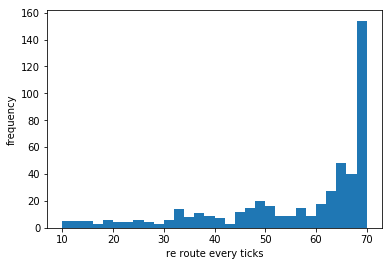

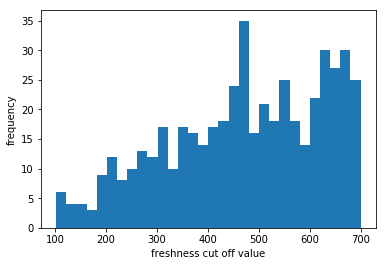

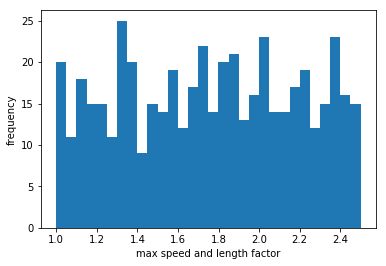

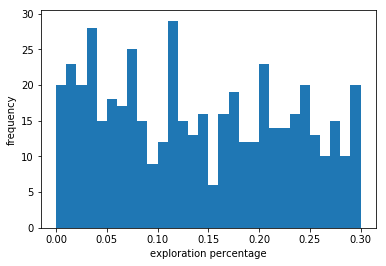

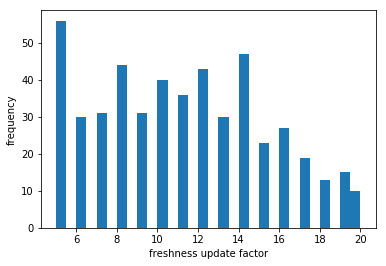

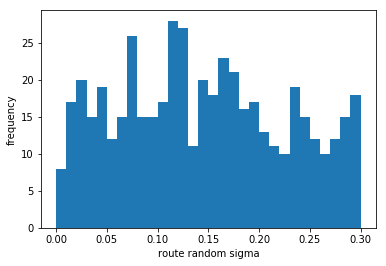

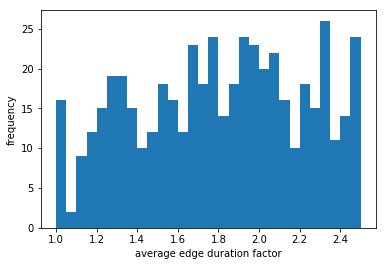

***************
700 cars


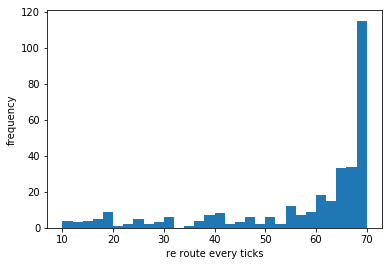

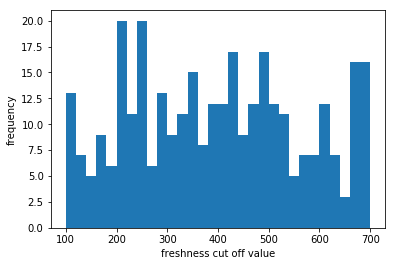

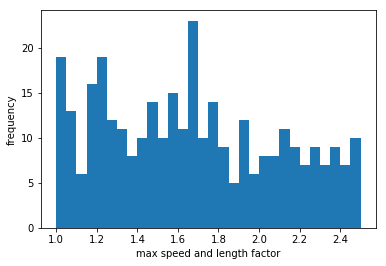

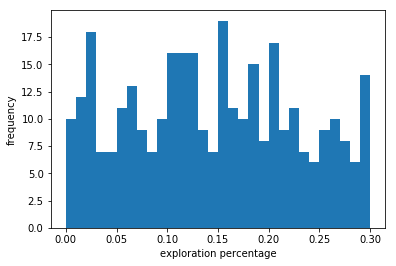

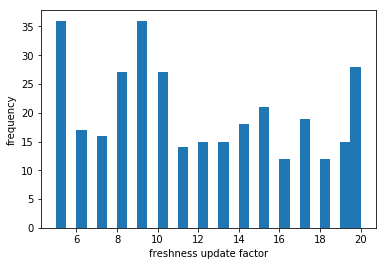

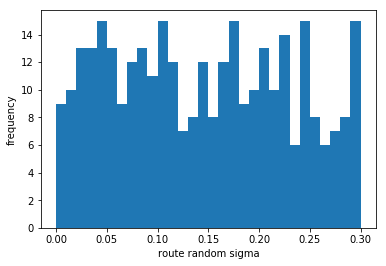

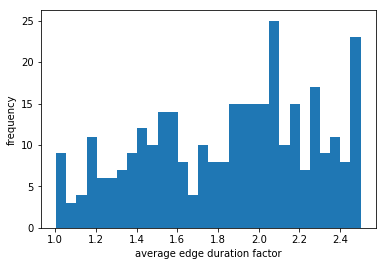

***************
800 cars


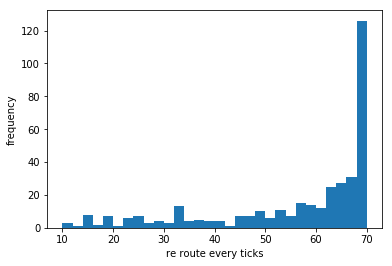

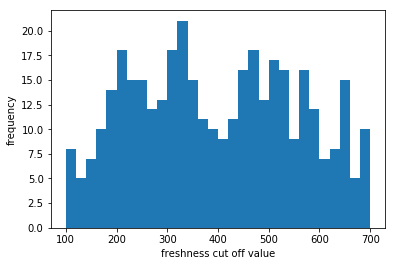

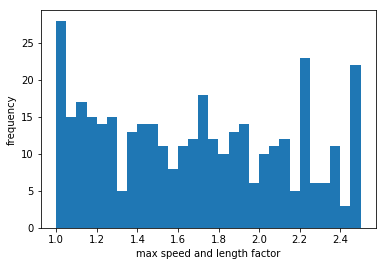

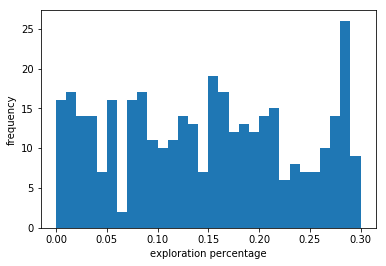

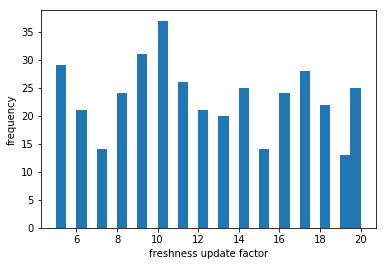

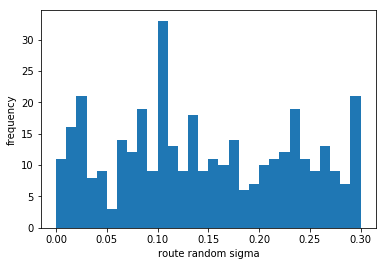

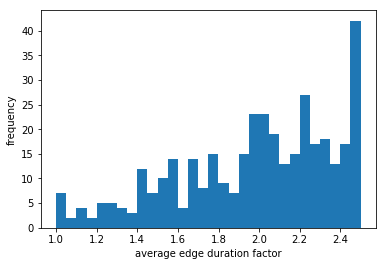

***************


In [7]:
def get_knobs(pfronts):
    knobs = []
    for pfront in pfronts:
        knobs += [el["knobs"] for el in pfront]
    return knobs

def add_pfronts(random_pfronts, mlr_pfronts, novelty_pfronts, nsga2_pfronts):
    knobs = []
    if random_pfronts: 
        knobs += get_knobs(random_pfronts)
    if mlr_pfronts:
        knobs += get_knobs(mlr_pfronts)
    if novelty_pfronts:
        knobs += get_knobs(novelty_pfronts)
    if nsga2_pfronts:
        knobs += get_knobs(nsga2_pfronts)
    return knobs
    
def plot_best_knob_values(random_pfronts, mlr_pfronts, novelty_pfronts, nsga2_pfronts):
    knobs = add_pfronts(random_pfronts, mlr_pfronts, novelty_pfronts, nsga2_pfronts)

    best_knobs = dict()
    best_knobs['average_edge_duration_factor'] = list()
    best_knobs['exploration_percentage'] =       list()
    best_knobs['freshness_cut_off_value'] =      list()
    best_knobs['freshness_update_factor'] =      list()
    best_knobs['max_speed_and_length_factor'] =  list() 
    best_knobs['re_route_every_ticks'] =         list() 
    best_knobs['route_random_sigma'] =           list()

    for knob in knobs: 
        best_knobs['average_edge_duration_factor'].append(knob["average_edge_duration_factor"])
        best_knobs['exploration_percentage'].append(knob["exploration_percentage"])
        best_knobs['freshness_cut_off_value'].append(knob["freshness_cut_off_value"])
        best_knobs['freshness_update_factor'].append(knob["freshness_update_factor"])
        best_knobs['max_speed_and_length_factor'].append(knob["max_speed_and_length_factor"])
        best_knobs['re_route_every_ticks'].append(knob["re_route_every_ticks"])
        best_knobs['route_random_sigma'].append(knob["route_random_sigma"])

    for knob_name, knob_values in best_knobs.iteritems(): 
        fig,ax = plt.subplots()
        plt.hist(knob_values, bins=30)  
        plt.ylabel('frequency')
        plt.xlabel(knob_name.replace("_", " "))
        plt.show()

# "route_random_sigma": (0.0, 0.3),
# "exploration_percentage": (0.0, 0.3),
# "max_speed_and_length_factor": (1, 2.5),
# "average_edge_duration_factor": (1, 2.5),
# "freshness_update_factor": (5, 20),
# "freshness_cut_off_value": (100, 700),
# "re_route_every_ticks": (10, 70)]
    
knobs_names = [
    "route_random_sigma",
    "exploration_percentage",
    "max_speed_and_length_factor",
    "average_edge_duration_factor",
    "freshness_update_factor",
    "freshness_cut_off_value",
    "re_route_every_ticks"
]
        
def generate_configurations(slots_per_parameter):
    configurations = {}
    for knob_name in knob_names: 
        for i in range(slots_per_parameter):
            configurations[knob_name + "_" + str(i)
    return configurations
    
        
def plot_best_configurations(random_pfronts, mlr_pfronts, novelty_pfronts, nsga2_pfronts):
    knobs = add_pfronts(random_pfronts, mlr_pfronts, novelty_pfronts, nsga2_pfronts)
    configurations = generate_configurations()
    print configurations
                           
#     TODO finish this!

print "500 cars"
plot_best_knob_values(random_500_pfronts, mlr_500_pfronts, novelty_500_pfronts, nsga2_500_pfronts)
print "***************"

print "700 cars"
plot_best_knob_values(random_700_pfronts, mlr_700_pfronts, novelty_700_pfronts, nsga2_700_pfronts)
print "***************"

print "800 cars"
plot_best_knob_values(random_800_pfronts, mlr_800_pfronts, novelty_800_pfronts, nsga2_800_pfronts)
print "***************"

print "--------------------------------------"

print "500 cars"
plot_best_configurations(random_500_pfronts, mlr_500_pfronts, novelty_500_pfronts, nsga2_500_pfronts)

## Find convergence points - OLD

100
{0: 1.9165622973594276, 1: 1.7630910946938563, 2: 1.7699468339878437, 3: 1.8236118438962698, 4: 1.7979504015492198, 5: 1.7591471102271323, 6: 1.7927619934819241, 7: 1.8249204069039355, 8: 1.8172637486339056, 9: 1.7958236971225117, 10: 1.7805288758184725, 11: 1.8402018787436063, 12: 1.7988831303967951, 13: 1.7901290653968267, 14: 1.7445088417672978, 15: 1.7996673330296937, 16: 1.7933637302178478, 17: 1.7547264866328904, 18: 1.8223809749670277, 19: 1.8048781096810242, 20: 1.802058198602257, 21: 1.7739470991062647, 22: 1.7872763199339656, 23: 1.7843936489448209, 24: 1.8750377837922827, 25: 1.7894121861900494, 26: 1.7780061570286474, 27: 1.8292303312987561, 28: 1.780720504412856, 29: 1.7736937898988141, 30: 1.7940941736870357, 31: 1.8283398775263715, 32: 1.7837769032145407, 33: 1.7758228971767378, 34: 1.7811903003254779, 35: 1.8050782242760814, 36: 1.7692387492861679, 37: 1.7468236951203435, 38: 1.762119104894923, 39: 1.8159153391418785, 40: 1.7909297241307003, 41: 1.7672567808705186, 

{0: 1.7954745221518635, 1: 1.7947735277242107, 2: 1.8360982669373254, 3: 1.7832845332219371, 4: 1.8248280993291239, 5: 1.7817514625505795, 6: 1.7515427758211846, 7: 1.7881155770448982, 8: 1.7863984352255691, 9: 1.8033951101776686, 10: 1.7767223603922564, 11: 1.8275273137227022, 12: 1.7879463608851061, 13: 1.8530172161277689, 14: 1.7685803689677171, 15: 1.7589382096524213, 16: 1.7933733234414881, 17: 1.7737053737033646, 18: 1.8218646816985433, 19: 1.8041631360048909, 20: 1.7989587439593882, 21: 1.7860355589413863, 22: 1.8080372280702024, 23: 1.811287057121588, 24: 1.8056420447940646, 25: 1.7817461239051831, 26: 1.7438064178256234, 27: 1.7910590289210948, 28: 1.7938113904685302, 29: 1.8372358681425507, 30: 1.7783586237657647, 31: 1.7912757242674997, 32: 1.7972190375923289, 33: 1.805910970833517, 34: 1.8267812007168192, 35: 1.8143614409497626, 36: 1.7887861075261939, 37: 1.8061499629533049, 38: 1.7688024378099272, 39: 1.8330298501752731, 40: 1.7904528258786843, 41: 1.7916559722241669, 42:

{0: 1.7799123850087788, 1: 1.7424848271343027, 2: 1.7983696859139526, 3: 1.7926169769453004, 4: 1.7751544577900822, 5: 1.7807717815628137, 6: 1.8269905242102544, 7: 1.7968717749559691, 8: 1.7669331005259172, 9: 1.7967963786215391, 10: 1.7601934799313066, 11: 1.7628545254204087, 12: 1.8397026898643147, 13: 1.7704482473181811, 14: 1.8296004580498553, 15: 1.7831748485384182, 16: 1.7907073403514471, 17: 1.7729064780372548, 18: 1.7971027668304371, 19: 1.8173630266096119, 20: 1.7943735205176039, 21: 1.7787805857790051, 22: 1.7713178170502557, 23: 1.7771170264236225, 24: 1.7934308808296417, 25: 1.8252501104169525, 26: 1.7702495788697081, 27: 1.7703797038731732, 28: 1.8347272856271666, 29: 1.791494839884431, 30: 1.839630560145693, 31: 1.7667798274282722, 32: 1.7826633498015358, 33: 1.7642940492638362, 34: 1.780806091267497, 35: 1.8419751676792613, 36: 1.8038590414302911, 37: 1.7695710106803086, 38: 1.9020280638885145, 39: 1.7354982172651308, 40: 1.7735515897656624, 41: 1.8172221819311147, 42: 

{0: 1.7920312543886314, 1: 1.8250543169856148, 2: 1.7750533825049664, 3: 1.8117066457242934, 4: 1.8065279452986605, 5: 1.7933620989041872, 6: 1.8096884514679852, 7: 1.8057206704663491, 8: 1.79109594958735, 9: 1.7590477740587149, 10: 1.7772105211784754, 11: 1.793911295732304, 12: 1.8247808376168839, 13: 1.8466629393997995, 14: 1.775036926490684, 15: 1.8154630107055065, 16: 1.772330218674623, 17: 1.77834665222445, 18: 1.7907675979472453, 19: 1.7794574656570301, 20: 1.8806373650613688, 21: 1.7962996129655959, 22: 1.8125542156599233, 23: 1.790525677052035, 24: 1.8786127161368014, 25: 1.8022096601166087, 26: 1.7526616802036472, 27: 1.8359565758375771, 28: 1.7665099063542304, 29: 1.8062832131909523, 30: 1.8214912521138715, 31: 1.7961407997779737, 32: 1.878543482434553, 33: 1.7913562732686485, 34: 1.8563597099989628, 35: 1.7800053941512903, 36: 1.7921260786694646, 37: 1.8478617655120437, 38: 1.7791742091089064, 39: 1.7860358678155128, 40: 1.8240155666571889, 41: 1.7701611235429677, 42: 1.8051

{0: 1.7885186582823216, 1: 1.7608163073238663, 2: 1.7402265433172797, 3: 1.7638375598005722, 4: 1.7419946061880167, 5: 1.757059936688387, 6: 1.7843431694823113, 7: 1.7544724469949127, 8: 1.7578710209872894, 9: 1.769580230365289, 10: 1.8128662484847728, 11: 1.756941068578844, 12: 1.7513301950295426, 13: 1.7632708823818339, 14: 1.8391729599704028, 15: 1.7985461937180109, 16: 1.7758388880766651, 17: 1.7825903845699689, 18: 1.7847617479830122, 19: 1.7858032957900665, 20: 1.8010608891306576, 21: 1.9145379972101986, 22: 1.7433738138258978, 23: 1.7852693532558892, 24: 1.8647015617297529, 25: 1.7522220945848677, 26: 1.7849093193713248, 27: 1.7686440049801153, 28: 1.8345311760962424, 29: 1.858010725000671, 30: 1.7766319089606899, 31: 1.8123791766243769, 32: 1.8051153203862726, 33: 1.7742734302309724, 34: 1.8355627495338667, 35: 1.8032480210120367, 36: 1.8117206193175457, 37: 1.7700823871813502, 38: 1.8351208414605702, 39: 1.7980789577380434, 40: 1.7969849875948944, 41: 1.7827351483146701, 42: 1

{0: 1.7878386602239913, 1: 1.7966845692926294, 2: 1.7763395232935868, 3: 1.788828104734977, 4: 1.8510981972166431, 5: 1.8036787548803774, 6: 1.7983265760679588, 7: 1.799371895359223, 8: 1.7743032562424461, 9: 1.7695802389085737, 10: 1.7638459946774048, 11: 1.7535267816767461, 12: 1.799246982470734, 13: 1.7809346083717006, 14: 1.7987349079205779, 15: 1.7743924791304981, 16: 1.7666471917677034, 17: 1.8093338899812166, 18: 1.8458850394897872, 19: 1.7399615521301199, 20: 1.7979391875191422, 21: 1.8177513378953234, 22: 1.7773062175335428, 23: 1.7668890658618348, 24: 1.7720786832686302, 25: 1.7445724610630051, 26: 1.8024238037477547, 27: 1.7828538175472208, 28: 1.7756884348682964, 29: 1.7563592023851422, 30: 1.7941917532427423, 31: 1.7736095565464831, 32: 1.7745605403794642, 33: 1.776397599710583, 34: 1.8019576704902567, 35: 1.772935139689011, 36: 1.7987192191440278, 37: 1.7512581312570816, 38: 1.7924810037498675, 39: 1.7732327383783755, 40: 1.7939228247463743, 41: 1.8012532616431802, 42: 1.

{0: 1.7928986877867632, 1: 1.7869777235107243, 2: 1.7673101377387239, 3: 1.7923526246356232, 4: 1.7847752319833246, 5: 1.8348864233662454, 6: 1.7630604383812751, 7: 1.7773819803765574, 8: 1.766835707539141, 9: 1.7699374893372881, 10: 1.7881216814609899, 11: 1.764748802559307, 12: 1.7363171287257246, 13: 1.7614152421023748, 14: 1.7582474697454515, 15: 1.7832902868079683, 16: 1.788999827621397, 17: 1.8013036818981527, 18: 1.7844813749643995, 19: 1.7591625463817, 20: 1.7633329112773113, 21: 1.7490226526148167, 22: 1.7744847440526959, 23: 1.8582361777198049, 24: 1.7764066036712887, 25: 1.78509827907117, 26: 1.7767856595976992, 27: 1.777424478880913, 28: 1.7821165177209186, 29: 1.7680781447232861, 30: 1.7559249973496229, 31: 1.8054706145807726, 32: 1.7761205297610774, 33: 1.7966133734435374, 34: 1.795098601357481, 35: 1.7884038483429343, 36: 1.8119243529460156, 37: 1.7706805686581355, 38: 1.7849892797261706, 39: 1.7722677329850238, 40: 1.8132162347942729, 41: 1.7935089457886111, 42: 1.79223

{0: 1.7590747689886272, 1: 1.7881322757987208, 2: 1.7550199752974656, 3: 1.772158477427523, 4: 1.7949095247395908, 5: 1.8074876112279541, 6: 1.7970005888558969, 7: 1.7622497678042659, 8: 1.7973540932519674, 9: 1.8384299583265202, 10: 1.7476306072236836, 11: 1.8002942276418874, 12: 1.7933296338337232, 13: 1.7575287861478497, 14: 1.7577499158564318, 15: 1.773353504621169, 16: 1.7681795140129903, 17: 1.804955924307734, 18: 1.7878229767634526, 19: 1.8500346209864604, 20: 1.7957095155409144, 21: 1.7543103630057693, 22: 1.8026046708571077, 23: 1.8071499985823196, 24: 1.7666602164593093, 25: 1.8085689635506372, 26: 1.8171790115485604, 27: 1.7763724265692862, 28: 1.7906967641293383, 29: 1.7671133799905037, 30: 1.7657865599518177, 31: 1.7833516649528298, 32: 1.7532620680127551, 33: 1.8152628539852831, 34: 1.7716742716194573, 35: 1.7611124465963688, 36: 1.7738252748476331, 37: 1.7686056916075563, 38: 1.8173040314763385, 39: 1.8000105897056238, 40: 1.8242352370433705, 41: 1.8070576134927505, 42: 

{0: 1.8282984626461518, 1: 1.8012756447332321, 2: 1.7760696232695372, 3: 1.7756581668056475, 4: 1.7714350360445548, 5: 1.7665641805415568, 6: 1.7614341703655592, 7: 1.7732375350301486, 8: 1.8087762467882873, 9: 1.8192057081612583, 10: 1.7570779686981877, 11: 1.7846425574601483, 12: 1.7722099797719744, 13: 1.7557285171277559, 14: 1.8342885245429483, 15: 1.7520509015566632, 16: 1.7968859398291555, 17: 1.8038622811974638, 18: 1.7626723054812667, 19: 1.764714016003043, 20: 1.7729563016468943, 21: 1.8028555507001642, 22: 1.7939983210867998, 23: 1.745383512584801, 24: 1.7639462351646267, 25: 1.786662528224702, 26: 1.7666963115532897, 27: 1.8277101100805528, 28: 1.788225671286751, 29: 1.7892280833331431, 30: 1.801062523540941, 31: 1.7924476359253863, 32: 1.8239860597132886, 33: 1.7522220307042797, 34: 1.7572152800370631, 35: 1.8406883981657254, 36: 1.7710583433627427, 37: 1.814866889212541, 38: 1.8042846169958255, 39: 1.8459445888514667, 40: 1.76682559745307, 41: 1.8144567211284863, 42: 1.796

{0: 1.8112388149870071, 1: 1.7733756392384625, 2: 1.8578272852479947, 3: 1.7850284481945982, 4: 1.7438466081708837, 5: 1.8447432395336523, 6: 1.799312488399629, 7: 1.7926134872959942, 8: 1.7748652227285466, 9: 1.7715462775517505, 10: 1.8136060557978424, 11: 1.774177127211251, 12: 1.7841741738879409, 13: 1.7792761069665122, 14: 1.7938032349763546, 15: 1.776339516568642, 16: 1.7572612343672742, 17: 1.7557621521789508, 18: 1.7793512357592269, 19: 1.7919818259572395, 20: 1.7740773403322212, 21: 1.7583202301921141, 22: 1.7903473724974326, 23: 1.8276605414053788, 24: 1.7678671835053437, 25: 1.7804375182042991, 26: 1.7919791892583359, 27: 1.835415042225099, 28: 1.7938660936104796, 29: 1.7496513205063595, 30: 1.7811265150132343, 31: 1.7866806715054977, 32: 1.832262255986798, 33: 1.77387676169658, 34: 1.797672701693364, 35: 1.7777082732422445, 36: 1.8061505257726327, 37: 1.8029812901348894, 38: 1.7977594132617014, 39: 1.7478477183234546, 40: 1.7670421162678234, 41: 1.8081117098986106, 42: 1.774

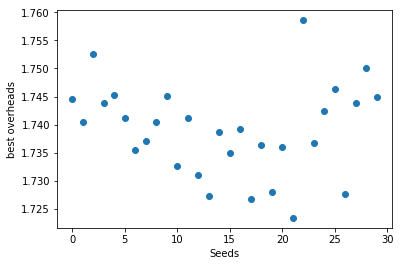

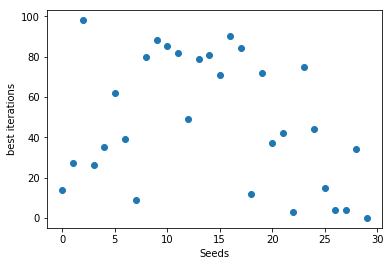

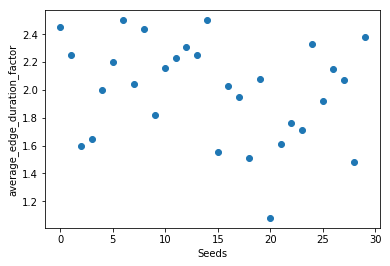

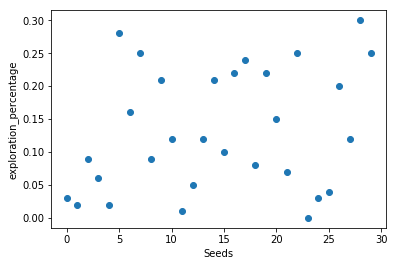

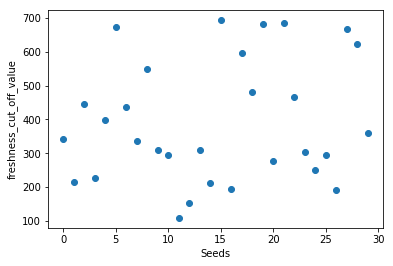

In [ ]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=450)
import pprint

pp = pprint.PrettyPrinter(indent=4)

iterations = 10
sample_size = 5000

bests = dict()

best_avg_overheads = list()
best_iterations = list()
best_knobs = dict()
best_knobs['average_edge_duration_factor'] = list()
best_knobs['exploration_percentage'] =       list()
best_knobs['freshness_cut_off_value'] =      list()
best_knobs['freshness_update_factor'] =      list()
best_knobs['max_speed_and_length_factor'] =  list() 
best_knobs['re_route_every_ticks'] =         list() 
best_knobs['route_random_sigma'] =           list()

for rtx_run in rtx_runs:
   
    data_for_run = [d["_source"] for d in data if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["iteration"], d["individual"]))
    
    print(len(data_for_run))
#     assert len(data_for_run) == iterations
    
    iteration_to_avg_overhead = dict()
    iteration_to_knobs_str = dict()
    iteration_to_knobs = dict()
    
    for i in range(len(data_for_run)):
        overheads_for_run = data_for_run[i]["payload"]["overheads"]
#         assert len(overheads_for_run) == sample_size
        if mean(overheads_for_run) > -1:
            iteration_to_avg_overhead[i] = mean(overheads_for_run)       
            iteration_to_knobs_str[i] = str(data_for_run[i]["knobs"])
            iteration_to_knobs[i] = data_for_run[i]["knobs"]

    iteration_of_min = min(iteration_to_avg_overhead, key=iteration_to_avg_overhead.get)
    
    print iteration_to_avg_overhead
    
    ##########################
    overheads = [d["payload"]["overheads"] for d in data_for_run]    
    avg_overheads = [mean(dataset) for dataset in overheads]   
    
#     plt.plot(range(iterations), avg_overheads, 'bo')
#     plt.ylabel('overheads of trips')
#     plt.xlabel('Iterations')
#     plt.show()
    
    #####  PARETO FRONT PLOT  ######
#     pareto_front = []
#     pareto_front.append(avg_overheads[0])
#     for j in range(1, len(avg_overheads)):
#         pareto_front.append(min(pareto_front[j-1],avg_overheads[j]))
#     fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
#     plt.plot(range(iterations), pareto_front, 'o')
#     plt.xticks(range(iterations))
#     plt.grid(True)
#     plt.ylabel('overheads of trips - PARETO')
#     plt.xlabel('Iterations')
#     plt.title("SEED " + str(rtx_run["seed"]))
#     plt.show()
    
    #####  RESULTS FOR RUN  ######
    print("Run " + rtx_run["id"] + " - seed " + str(rtx_run["seed"]))
    print("Minimum average overhead: " + str(iteration_to_avg_overhead[iteration_of_min]))
    print("Found in iteration: " + str(iteration_of_min))
    print("With configuration: ")
    pp.pprint(eval(iteration_to_knobs_str[iteration_of_min]))
    print "*********************\n"
    
    best_avg_overheads.append(iteration_to_avg_overhead[iteration_of_min])
    best_iterations.append(iteration_of_min)
    
    best_knob = iteration_to_knobs[iteration_of_min]
    best_knobs['average_edge_duration_factor'].append(best_knob["average_edge_duration_factor"])
    best_knobs['exploration_percentage'].append(best_knob["exploration_percentage"])
    best_knobs['freshness_cut_off_value'].append(best_knob["freshness_cut_off_value"])
    best_knobs['freshness_update_factor'].append(best_knob["freshness_update_factor"])
    best_knobs['max_speed_and_length_factor'].append(best_knob["max_speed_and_length_factor"])
    best_knobs['re_route_every_ticks'].append(best_knob["re_route_every_ticks"])
    best_knobs['route_random_sigma'].append(best_knob["route_random_sigma"])


# fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(len(rtx_runs)), best_avg_overheads, 'o')
plt.ylabel('best overheads')
plt.xlabel('Seeds')
plt.show()

# fig=plt.figure(figsize=(25, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(range(len(rtx_runs)), best_iterations, 'o')
plt.ylabel('best iterations')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['average_edge_duration_factor'], 'o')
plt.ylabel('average_edge_duration_factor')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['exploration_percentage'], 'o')
plt.ylabel('exploration_percentage')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['freshness_cut_off_value'], 'o')
plt.ylabel('freshness_cut_off_value')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['freshness_update_factor'], 'o')
plt.ylabel('freshness_update_factor')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['max_speed_and_length_factor'], 'o')
plt.ylabel('max_speed_and_length_factor')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['re_route_every_ticks'], 'o')
plt.ylabel('re_route_every_ticks')
plt.xlabel('Seeds')
plt.show()

plt.plot(range(len(rtx_runs)), best_knobs['route_random_sigma'], 'o')
plt.ylabel('route_random_sigma')
plt.xlabel('Seeds')
plt.show()

## Do some first plots - just for quick checking of a run

100


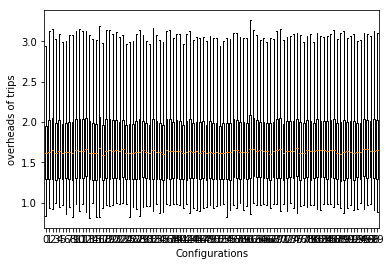

In [10]:
import matplotlib.pyplot as plt
from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

rtx_run_id = "AWg1D4Yg-DH7UHKUO4zo"
overheads = [d["_source"]["payload"]["overheads"] for d in data if d["parent"] == rtx_run_id]
print(len(overheads))

fig,ax = plt.subplots()
ax.boxplot(overheads, 0, '', positions=range(len(overheads)))
plt.ylabel('overheads of trips')
plt.xlabel('Configurations')
plt.show()